In [2]:
%pip install keras
%pip install tensorflow
%pip install numpy pandas matplotlib scikit-learn

^C
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/pip/__main__.py", line 22, in <module>
    from pip._internal.cli.main import main as _main
  File "/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/pip/_internal/cli/main.py", line 11, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/pip/_internal/cli/main_parser.py", line 9, in <module>
    from pip._internal.build_env import get_runnable_pip
  File "/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/pip/_internal

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

2024-10-30 10:43:44.015362: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Data Preprocessing
### Feature Data Shuffle


In [4]:
# Feature Data Load
ppg_041 = pd.read_csv('../Data/ppg_features_041.csv')
ppg_427 = pd.read_csv('../Data/ppg_features_427.csv')
ppg_212 = pd.read_csv('../Data/ppg_features_212.csv')
ppg_224 = pd.read_csv('../Data/ppg_features_224.csv')
ppg_237 = pd.read_csv('../Data/ppg_features_237.csv')
ppg_240 = pd.read_csv('../Data/ppg_features_240.csv')
ppg_414 = pd.read_csv('../Data/ppg_features_414.csv')

# SBP Data Load
sbp_041 = pd.read_csv('../Data/sbp_041.csv')
sbp_427 = pd.read_csv('../Data/sbp_427.csv')
sbp_212 = pd.read_csv('../Data/sbp_212.csv')
sbp_224 = pd.read_csv('../Data/sbp_224.csv')
sbp_237 = pd.read_csv('../Data/sbp_237.csv')
sbp_240 = pd.read_csv('../Data/sbp_240.csv')
sbp_414 = pd.read_csv('../Data/sbp_414.csv')

# DBP Data Load
dbp_041 = pd.read_csv('../Data/dbp_041.csv')
dbp_427 = pd.read_csv('../Data/dbp_427.csv')
dbp_212 = pd.read_csv('../Data/dbp_212.csv')
dbp_224 = pd.read_csv('../Data/dbp_224.csv')
dbp_237 = pd.read_csv('../Data/dbp_237.csv')
dbp_240 = pd.read_csv('../Data/dbp_240.csv')
dbp_414 = pd.read_csv('../Data/dbp_414.csv')

In [5]:
# List of datasets
feature_data = [ppg_041,ppg_212,ppg_224,ppg_237,ppg_240,ppg_414,ppg_427]
sbp_data = [sbp_041,sbp_212,sbp_224,sbp_237,sbp_240,sbp_414,sbp_427]
dbp_data = [dbp_041,dbp_212,dbp_224,dbp_237,dbp_240,dbp_414,dbp_427]

# List for saving training set and test set
X_train_set = []
X_test_set = []
SBP_y_train_set =[]
SBP_y_test_set = []
DBP_y_train_set =[]
DBP_y_test_set = []

# For every datasets execute train_test_split
for i in range(len(feature_data)):
    X_train, X_test, SBP_Y_train, SBP_Y_test = train_test_split(feature_data[i], sbp_data[i], test_size=0.2, random_state=42)
    _, _, DBP_Y_train, DBP_Y_test = train_test_split(feature_data[i], dbp_data[i], test_size=0.2, random_state=42)

    # Save training set and test set
    X_train_set.append(X_train)
    X_test_set.append(X_test)
    SBP_y_train_set.append(SBP_Y_train)
    SBP_y_test_set.append(SBP_Y_test)
    DBP_y_train_set.append(DBP_Y_train)
    DBP_y_test_set.append(DBP_Y_test)

# Save the combined traning set and test set
X_train_combined = pd.concat(X_train_set, axis=0)
X_test_combined = pd.concat(X_test_set, axis=0)
SBP_Y_train_combined = pd.concat(SBP_y_train_set, axis=0)
SBP_Y_test_combined = pd.concat(SBP_y_test_set, axis=0)
DBP_Y_train_combined = pd.concat(DBP_y_train_set, axis=0)
DBP_Y_test_combined = pd.concat(DBP_y_test_set, axis=0)

# Change the dimension
# X_train_combined = X_train_combined.values.reshape(-1, X_train_combined.shape[1], 1)
# X_test_combined = X_test_combined.values.reshape(-1, X_test_combined.shape[1], 1)
# SBP_Y_train_combined = SBP_Y_train_combined.values.reshape(-1, SBP_Y_train_combined.shape[1],1)
# SBP_Y_test_combined = SBP_Y_test_combined.values.reshape(-1, SBP_Y_test_combined.shape[1], 1)
# DBP_Y_train_combined = DBP_Y_train_combined.values.reshape(-1, DBP_Y_train_combined[1], 1)
# DBP_Y_test_combined = DBP_Y_test_combined.values.reshape(-1, DBP_Y_test_combined[1], 1)

# 결과 확인
print("X_train_combined shape:", X_train_combined.shape)
print("X_test_combined shape:", X_test_combined.shape)
print("SBP_Y_train_combined shape:", SBP_Y_train_combined.shape)
print("SBP_Y_test_combined shape:", SBP_Y_test_combined.shape)
print("DBP_Y_train_combined shape:", DBP_Y_train_combined.shape)
print("DBP_Y_test_combined shape:", DBP_Y_test_combined.shape)

X_train_combined shape: (5975, 26)
X_test_combined shape: (1496, 26)
SBP_Y_train_combined shape: (5975, 1)
SBP_Y_test_combined shape: (1496, 1)
DBP_Y_train_combined shape: (5975, 1)
DBP_Y_test_combined shape: (1496, 1)


In [6]:
# Data shuffle
# 인덱스를 생성하여 섞기
n_train = X_train_combined.shape[0]  # 훈련 데이터의 샘플 수
n_test = X_test_combined.shape[0]      # 테스트 데이터의 샘플 수

# 훈련 세트와 테스트 세트의 인덱스 생성
train_indices = shuffle(range(n_train), random_state=42)
test_indices = shuffle(range(n_test), random_state=42)

# 섞인 인덱스를 사용하여 데이터셋 재배열
X_train_combined = X_train_combined.iloc[train_indices].reset_index(drop=True)
SBP_Y_train_combined = SBP_Y_train_combined.iloc[train_indices].reset_index(drop=True)
DBP_Y_train_combined = DBP_Y_train_combined.iloc[train_indices].reset_index(drop=True)

X_test_combined = X_test_combined.iloc[test_indices].reset_index(drop=True)
SBP_Y_test_combined = SBP_Y_test_combined.iloc[test_indices].reset_index(drop=True)
DBP_Y_test_combined = DBP_Y_test_combined.iloc[test_indices].reset_index(drop=True)

# 결과 확인
print("X_train_combined shape:", X_train_combined.shape)
print("SBP_Y_train_combined shape:", SBP_Y_train_combined.shape)
print("DBP_Y_train_combined shape:", DBP_Y_train_combined.shape)
print("X_test_combined shape:", X_test_combined.shape)
print("SBP_Y_test_combined shape:", SBP_Y_test_combined.shape)
print("DBP_Y_test_combined shape:", DBP_Y_test_combined.shape)


X_train_combined shape: (5975, 26)
SBP_Y_train_combined shape: (5975, 1)
DBP_Y_train_combined shape: (5975, 1)
X_test_combined shape: (1496, 26)
SBP_Y_test_combined shape: (1496, 1)
DBP_Y_test_combined shape: (1496, 1)


#### Dimension Transform

In [7]:
X_train_combined = X_train_combined.values.reshape(-1, X_train_combined.shape[1], 1)
X_test_combined = X_test_combined.values.reshape(-1, X_test_combined.shape[1], 1)

In [8]:
print("X_train_combined shape:", X_train_combined.shape)
print("X_test_combined shape:", X_test_combined.shape)

X_train_combined shape: (5975, 26, 1)
X_test_combined shape: (1496, 26, 1)


## 1D CNN 정의

In [8]:
# 1D CNN 모델 정의 (회귀용)
sbp_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_combined.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.5),
    Dense(1)  # 회귀 문제이므로 활성화 함수 없음
])

sbp_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# 1D CNN 모델 정의 (회귀용)
sbp1_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_combined.shape[1], 26)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.5),
    Dense(1)  # 회귀 문제이므로 활성화 함수 없음
])

sbp1_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 1D CNN for SBP

### Early stopping (patience)
-> epoch = 50, batch-size = 32
- Patience 40: Loss = 130.7982, MAE = 8.3416
- Patience 30: Loss = 133.9735, MAE = 8.5733
- Patience 20: Loss = 133.4155, MAE = 8.3988, Early Stopping Epoch: 45
- Patience 10: Loss = 135.6743, MAE = 8.6578

### Early stopping (patience)
-> epoch = 60, bach-size = 32
- Patience 40: Loss = 132.0500, MAE = 8.4166
- Patience 30: Loss = 131.8998, MAE = 8.3849
- Patience 20: Loss = 130.9753, MAE = 8.3171
- Patience 10: Loss = 133.8357, MAE = 8.4918, Early Stopping Epoch: 49

### Early stopping (patience)
-> epoch = 100, batch-size = 32
- Patience 40: Loss = 125.8191, MAE = 8.2690
- Patience 30: Loss = 128.9418, MAE = 8.3847
- Patience 20: Loss = 130.0474, MAE = 8.3904, Early Stopping Epoch: 85
- Patience 10: Loss = 136.6824, MAE = 8.7105, Early Stopping Epoch: 32

### Early stopping (patience)
-> epoch 150, batch-size = 32
- Patience 40: Loss = 119.9662, MAE = 7.9446
- Patience 30: Loss = 120.1098, MAE = 7.9087
- Patience 20: Loss = 128.5647, MAE = 8.3220, Early Stopping Epoch: 56
- Patience 10: Loss = 131.9538, MAE = 8.3988, Early Stopping Epoch: 56

### Early stopping (patience)
-> epoch 150, batch-size = 16
- Patience 40: Loss = 118.5138, MAE = 8.0349
- Patience 30: Loss = 116.7564, MAE = 7.8032
- Patience 20: Loss = 113.8299, MAE = 7.6948, Early Stopping Epoch: 141
- Patience 10: Loss = 138.4038, MAE = 8.6944, Early Stopping Epoch: 25

### Early stopping (patience)
-> epoch 200, batch-size = 16
- Patience 40: Loss = 117.5314, MAE = 7.9175
- Patience 30: Loss = 119.4077, MAE = 7.9994, Early Stopping Epoch: 144
- Patience 20: Loss = 125.5098, MAE = 8.2240, Early Stopping Epoch: 105
- Patience 10: Loss = 135.0204, MAE = 8.4157, Early Stopping Epoch: 33

### Early stopping (patience)
-> epoch 200, batch-size = 32
- Patience 40: Loss = 117.0957, MAE = 7.9254
- Patience 30: Loss = 124.4492, MAE = 8.1072, Early Stopping Epoch: 93
- Patience 20: Loss = 123.5643, MAE = 8.1035, Early Stopping Epoch: 112
- Patience 10: Loss = 132.8055, MAE = 8.4746, Early Stopping Epoch: 41

In [17]:
# Patience 값 리스트
patience_values = [40, 30, 20, 10]

# 결과 저장을 위한 리스트
results = []

for patience in patience_values:
    # 1D CNN 모델 정의 (회귀용)
    sbp_model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_combined.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Conv1D(filters=32, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(100, activation='relu'),
        Dropout(0.5),
        Dense(1)  # 회귀 문제이므로 활성화 함수 없음
    ])

    # 모델 컴파일
    sbp_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    # 콜백 설정
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint('best_model_{}.keras'.format(patience), monitor='val_loss', save_best_only=True)

    # 모델 학습
    history = sbp_model.fit(
        X_train_combined, SBP_Y_train_combined,
        epochs=50,
        batch_size=32,
        validation_data=(X_test_combined, SBP_Y_test_combined),
        callbacks=[early_stopping, model_checkpoint]
    )

    # Early stopping 여부와 발생한 epoch 저장
    early_stopping_occurred = early_stopping.stopped_epoch > 0
    early_stopping_epoch = early_stopping.stopped_epoch if early_stopping_occurred else None

    # Early stopping 여부 확인 및 출력
    if early_stopping_occurred:
        print(f"Patience {patience}: Early stopping occurred at epoch {early_stopping_epoch}")
    else:
        print(f"Patience {patience}: Early stopping did not occur")

    # 검증 데이터로 모델 평가
    val_loss, val_mae = sbp_model.evaluate(X_test_combined, SBP_Y_test_combined)
    print(f"Patience {patience}: Validation MAE: {val_mae:.2f}")
    print(f"Patience {patience}: Validation Loss: {val_loss:.2f}")

    # 결과 저장
    results.append({
        'patience': patience,
        'val_loss': val_loss,
        'val_mae': val_mae,
        'early_stopping_occurred': early_stopping_occurred,
        'early_stopping_epoch': early_stopping_epoch
    })

# 최종 결과 확인
print("\nSummary of Results:")
for result in results:
    print(f"Patience {result['patience']}: Loss = {result['val_loss']:.4f}, MAE = {result['val_mae']:.4f}, "
          f"Early Stopping Occurred: {result['early_stopping_occurred']}, "
          f"Early Stopping Epoch: {result['early_stopping_epoch'] if result['early_stopping_occurred'] is not None else 'N/A'}")


Epoch 1/50


/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 3517.5842 - mae: 43.2344 - val_loss: 311.4554 - val_mae: 13.8524
Epoch 2/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 758.9298 - mae: 21.5173 - val_loss: 315.1459 - val_mae: 13.7151
Epoch 3/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 694.5419 - mae: 20.8257 - val_loss: 271.6381 - val_mae: 13.6766
Epoch 4/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 689.0380 - mae: 20.5735 - val_loss: 263.9403 - val_mae: 12.3393
Epoch 5/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 607.6951 - mae: 19.3215 - val_loss: 226.7682 - val_mae: 11.4221
Epoch 6/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 588.8388 - mae: 19.0323 - val_loss: 209.4503 - val_mae: 10.9761
Epoch 7/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 538.7501 - mae: 18.2556 - val_loss: 181.4183 - val_mae: 10.2804
Epoch 8/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 543.0579 - mae: 18.1814 - val_loss: 164.2315 - val_mae: 9.7285
Epoch 9/50
187/187 

/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 2419.7424 - mae: 34.8230 - val_loss: 350.6844 - val_mae: 14.1472
Epoch 2/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 708.0203 - mae: 20.8876 - val_loss: 296.8989 - val_mae: 13.3631
Epoch 3/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 640.0282 - mae: 19.9401 - val_loss: 238.2248 - val_mae: 12.5231
Epoch 4/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 575.3383 - mae: 18.8250 - val_loss: 230.9375 - val_mae: 11.5566
Epoch 5/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 575.3060 - mae: 18.7779 - val_loss: 186.1961 - val_mae: 10.4516
Epoch 6/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 538.0847 - mae: 18.1670 - val_loss: 166.7232 - val_mae: 9.9230
Epoch 7/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 509.6489 - mae: 17.6535 - val_loss: 167.0418 - val_mae: 9.9662
Epoch 8/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 510.9900 - mae: 17.5577 - val_loss: 198.6626 - val_mae: 11.1548
Epoch 9/50
187/187 ━

/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 2428.4746 - mae: 35.2584 - val_loss: 324.1107 - val_mae: 13.7421
Epoch 2/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 612.7612 - mae: 19.5084 - val_loss: 257.9901 - val_mae: 12.1817
Epoch 3/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 545.3333 - mae: 18.2720 - val_loss: 284.8916 - val_mae: 13.8317
Epoch 4/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 508.0552 - mae: 17.6649 - val_loss: 220.3966 - val_mae: 11.8133
Epoch 5/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 489.5115 - mae: 17.1767 - val_loss: 175.3313 - val_mae: 10.1250
Epoch 6/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 475.3370 - mae: 17.0900 - val_loss: 201.1241 - val_mae: 10.7385
Epoch 7/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 442.0176 - mae: 16.4104 - val_loss: 184.6477 - val_mae: 10.3499
Epoch 8/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 438.6997 - mae: 16.3250 - val_loss: 169.0602 - val_mae: 9.9727
Epoch 9/50
187/187 

/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1876.5601 - mae: 30.3172 - val_loss: 328.4549 - val_mae: 14.5168
Epoch 2/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 671.6064 - mae: 20.4208 - val_loss: 293.7720 - val_mae: 13.0784
Epoch 3/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 606.8690 - mae: 19.2498 - val_loss: 347.1566 - val_mae: 14.1798
Epoch 4/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 544.9440 - mae: 18.2622 - val_loss: 223.7978 - val_mae: 11.8923
Epoch 5/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 519.5793 - mae: 17.7409 - val_loss: 259.0520 - val_mae: 12.3858
Epoch 6/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 493.7301 - mae: 17.3603 - val_loss: 208.7189 - val_mae: 11.0041
Epoch 7/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 493.1809 - mae: 17.2587 - val_loss: 276.5468 - val_mae: 13.4983
Epoch 8/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 460.2725 - mae: 16.7019 - val_loss: 168.4876 - val_mae: 9.7897
Epoch 9/50
187/187 

In [19]:
# Patience 값 리스트
patience_values = [40, 30, 20, 10]

# 결과 저장을 위한 리스트
results = []

for patience in patience_values:
    # 1D CNN 모델 정의 (회귀용)
    sbp_model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_combined.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Conv1D(filters=32, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(100, activation='relu'),
        Dropout(0.5),
        Dense(1)  # 회귀 문제이므로 활성화 함수 없음
    ])

    # 모델 컴파일
    sbp_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    # 콜백 설정
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint('best_model_{}.keras'.format(patience), monitor='val_loss', save_best_only=True)

    # 모델 학습
    history = sbp_model.fit(
        X_train_combined, SBP_Y_train_combined,
        epochs=60,
        batch_size=32,
        validation_data=(X_test_combined, SBP_Y_test_combined),
        callbacks=[early_stopping, model_checkpoint]
    )

    # Early stopping 여부와 발생한 epoch 저장
    early_stopping_occurred = early_stopping.stopped_epoch > 0
    early_stopping_epoch = early_stopping.stopped_epoch if early_stopping_occurred else None

    # Early stopping 여부 확인 및 출력
    if early_stopping_occurred:
        print(f"Patience {patience}: Early stopping occurred at epoch {early_stopping_epoch}")
    else:
        print(f"Patience {patience}: Early stopping did not occur")

    # 검증 데이터로 모델 평가
    val_loss, val_mae = sbp_model.evaluate(X_test_combined, SBP_Y_test_combined)
    print(f"Patience {patience}: Validation MAE: {val_mae:.2f}")
    print(f"Patience {patience}: Validation Loss: {val_loss:.2f}")

    # 결과 저장
    results.append({
        'patience': patience,
        'val_loss': val_loss,
        'val_mae': val_mae,
        'early_stopping_occurred': early_stopping_occurred,
        'early_stopping_epoch': early_stopping_epoch
    })

# 최종 결과 확인
print("\nSummary of Results:")
for result in results:
    print(f"Patience {result['patience']}: Loss = {result['val_loss']:.4f}, MAE = {result['val_mae']:.4f}, "
          f"Early Stopping Occurred: {result['early_stopping_occurred']}, "
          f"Early Stopping Epoch: {result['early_stopping_epoch'] if result['early_stopping_occurred'] is not None else 'N/A'}")


Epoch 1/60


/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 2660.0659 - mae: 37.6102 - val_loss: 335.8769 - val_mae: 14.5281
Epoch 2/60
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 726.2780 - mae: 21.1000 - val_loss: 279.9557 - val_mae: 13.2839
Epoch 3/60
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 659.7251 - mae: 20.3383 - val_loss: 348.3882 - val_mae: 14.1439
Epoch 4/60
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 627.9362 - mae: 19.4981 - val_loss: 344.6612 - val_mae: 14.3677
Epoch 5/60
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 607.0952 - mae: 19.3225 - val_loss: 272.5487 - val_mae: 12.8472
Epoch 6/60
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 563.4960 - mae: 18.3688 - val_loss: 228.4538 - val_mae: 11.6982
Epoch 7/60
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 515.2777 - mae: 17.9654 - val_loss: 160.4819 - val_mae: 9.6217
Epoch 8/60
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 468.4193 - mae: 16.9073 - val_loss: 192.8147 - val_mae: 10.8068
Epoch 9/60
187/187 

/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2263.5962 - mae: 34.3710 - val_loss: 329.3357 - val_mae: 13.8312
Epoch 2/60
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 690.0195 - mae: 20.7915 - val_loss: 356.2259 - val_mae: 14.1067
Epoch 3/60
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 653.4977 - mae: 19.9672 - val_loss: 243.5459 - val_mae: 11.8363
Epoch 4/60
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 619.2867 - mae: 19.5941 - val_loss: 201.8539 - val_mae: 11.0936
Epoch 5/60
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 559.6918 - mae: 18.4084 - val_loss: 209.9557 - val_mae: 11.0194
Epoch 6/60
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 519.1502 - mae: 17.8664 - val_loss: 214.0099 - val_mae: 11.4900
Epoch 7/60
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 548.3091 - mae: 18.1344 - val_loss: 173.8268 - val_mae: 9.9549
Epoch 8/60
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 515.6169 - mae: 17.5552 - val_loss: 194.8403 - val_mae: 10.7918
Epoch 9/60
187/187 

/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2732.9758 - mae: 38.0946 - val_loss: 402.0098 - val_mae: 14.6549
Epoch 2/60
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 833.7571 - mae: 22.5558 - val_loss: 313.3476 - val_mae: 13.7728
Epoch 3/60
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 723.6130 - mae: 21.3552 - val_loss: 282.1398 - val_mae: 13.8364
Epoch 4/60
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 695.4171 - mae: 20.8609 - val_loss: 343.3621 - val_mae: 13.8204
Epoch 5/60
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 704.8497 - mae: 20.8189 - val_loss: 279.2776 - val_mae: 12.5618
Epoch 6/60
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 639.2498 - mae: 19.7997 - val_loss: 211.6243 - val_mae: 11.1519
Epoch 7/60
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 639.1559 - mae: 19.7792 - val_loss: 211.2061 - val_mae: 10.9277
Epoch 8/60
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 603.6703 - mae: 19.1811 - val_loss: 252.6437 - val_mae: 12.3303
Epoch 9/60
187/187

/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3432.1438 - mae: 38.8284 - val_loss: 315.6544 - val_mae: 13.8290
Epoch 2/60
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 716.4574 - mae: 20.8001 - val_loss: 264.9380 - val_mae: 12.8015
Epoch 3/60
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 633.2377 - mae: 20.0573 - val_loss: 243.8321 - val_mae: 11.9650
Epoch 4/60
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 568.5576 - mae: 18.8311 - val_loss: 201.5931 - val_mae: 11.0293
Epoch 5/60
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 570.8619 - mae: 18.5736 - val_loss: 195.8046 - val_mae: 10.8537
Epoch 6/60
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 540.1967 - mae: 18.1806 - val_loss: 222.4901 - val_mae: 11.7061
Epoch 7/60
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 500.0784 - mae: 17.4001 - val_loss: 159.5271 - val_mae: 9.5562
Epoch 8/60
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 475.0110 - mae: 17.2439 - val_loss: 193.8619 - val_mae: 10.6928
Epoch 9/60
187/187 

In [13]:
# Patience 값 리스트
patience_values = [40, 30, 20, 10]

# 결과 저장을 위한 리스트
results100 = []

for patience in patience_values:
    # 1D CNN 모델 정의 (회귀용)
    sbp_model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_combined.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Conv1D(filters=32, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(100, activation='relu'),
        Dropout(0.5),
        Dense(1)  # 회귀 문제이므로 활성화 함수 없음
    ])

    # 모델 컴파일
    sbp_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    # 콜백 설정
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint('best_model_{}.keras'.format(patience), monitor='val_loss', save_best_only=True)

    # 모델 학습
    history = sbp_model.fit(
        X_train_combined, SBP_Y_train_combined,
        epochs=100,
        batch_size=32,
        validation_data=(X_test_combined, SBP_Y_test_combined),
        callbacks=[early_stopping, model_checkpoint]
    )

    # Early stopping 여부와 발생한 epoch 저장
    early_stopping_occurred = early_stopping.stopped_epoch > 0
    early_stopping_epoch = early_stopping.stopped_epoch if early_stopping_occurred else None

    # Early stopping 여부 확인 및 출력
    if early_stopping_occurred:
        print(f"Patience {patience}: Early stopping occurred at epoch {early_stopping_epoch}")
    else:
        print(f"Patience {patience}: Early stopping did not occur")

    # 검증 데이터로 모델 평가
    val_loss, val_mae = sbp_model.evaluate(X_test_combined, SBP_Y_test_combined)
    print(f"Patience {patience}: Validation MAE: {val_mae:.2f}")
    print(f"Patience {patience}: Validation Loss: {val_loss:.2f}")

    # 결과 저장
    results100.append({
        'patience': patience,
        'val_loss': val_loss,
        'val_mae': val_mae,
        'early_stopping_occurred': early_stopping_occurred,
        'early_stopping_epoch': early_stopping_epoch
    })

# 최종 결과 확인
print("\nSummary of Results:")
for result in results100:
    print(f"Patience {result['patience']}: Loss = {result['val_loss']:.4f}, MAE = {result['val_mae']:.4f}, "
          f"Early Stopping Occurred: {result['early_stopping_occurred']}, "
          f"Early Stopping Epoch: {result['early_stopping_epoch'] if result['early_stopping_occurred'] is not None else 'N/A'}")


Epoch 1/100


/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


KeyboardInterrupt: 

In [25]:
# Patience 값 리스트
patience_values = [40, 30, 20, 10]

# 결과 저장을 위한 리스트
results150 = []

for patience in patience_values:
    # 1D CNN 모델 정의 (회귀용)
    sbp_model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_combined.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Conv1D(filters=32, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(100, activation='relu'),
        Dropout(0.5),
        Dense(1)  # 회귀 문제이므로 활성화 함수 없음
    ])

    # 모델 컴파일
    sbp_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    # 콜백 설정
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint('best_model_{}.keras'.format(patience), monitor='val_loss', save_best_only=True)

    # 모델 학습
    history = sbp_model.fit(
        X_train_combined, SBP_Y_train_combined,
        epochs=150,
        batch_size=32,
        validation_data=(X_test_combined, SBP_Y_test_combined),
        callbacks=[early_stopping, model_checkpoint]
    )

    # Early stopping 여부와 발생한 epoch 저장
    early_stopping_occurred = early_stopping.stopped_epoch > 0
    early_stopping_epoch = early_stopping.stopped_epoch if early_stopping_occurred else None

    # Early stopping 여부 확인 및 출력
    if early_stopping_occurred:
        print(f"Patience {patience}: Early stopping occurred at epoch {early_stopping_epoch}")
    else:
        print(f"Patience {patience}: Early stopping did not occur")

    # 검증 데이터로 모델 평가
    val_loss, val_mae = sbp_model.evaluate(X_test_combined, SBP_Y_test_combined)
    print(f"Patience {patience}: Validation MAE: {val_mae:.2f}")
    print(f"Patience {patience}: Validation Loss: {val_loss:.2f}")

    # 결과 저장
    results150.append({
        'patience': patience,
        'val_loss': val_loss,
        'val_mae': val_mae,
        'early_stopping_occurred': early_stopping_occurred,
        'early_stopping_epoch': early_stopping_epoch
    })

# 최종 결과 확인
print("\nSummary of Results:")
for result in results150:
    print(f"Patience {result['patience']}: Loss = {result['val_loss']:.4f}, MAE = {result['val_mae']:.4f}, "
          f"Early Stopping Occurred: {result['early_stopping_occurred']}, "
          f"Early Stopping Epoch: {result['early_stopping_epoch'] if result['early_stopping_occurred'] is not None else 'N/A'}")


Epoch 1/150


/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2756.9397 - mae: 38.2122 - val_loss: 329.1886 - val_mae: 14.0466
Epoch 2/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 806.1430 - mae: 22.5894 - val_loss: 451.5830 - val_mae: 15.7330
Epoch 3/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 796.3928 - mae: 22.3537 - val_loss: 256.7690 - val_mae: 12.7578
Epoch 4/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 738.3734 - mae: 21.4442 - val_loss: 246.1388 - val_mae: 12.0865
Epoch 5/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 703.0992 - mae: 20.7352 - val_loss: 266.7650 - val_mae: 12.3916
Epoch 6/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 604.6635 - mae: 19.4570 - val_loss: 281.0506 - val_mae: 12.6886
Epoch 7/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 638.8754 - mae: 19.7918 - val_loss: 192.2794 - val_mae: 10.4928
Epoch 8/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 597.9529 - mae: 19.1211 - val_loss: 200.7738 - val_mae: 10.8518
Epoch 9/150

/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1996.4650 - mae: 31.8157 - val_loss: 364.2774 - val_mae: 14.1729
Epoch 2/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 741.8480 - mae: 21.3002 - val_loss: 348.9017 - val_mae: 13.9510
Epoch 3/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 670.7995 - mae: 20.4676 - val_loss: 282.8304 - val_mae: 12.9814
Epoch 4/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 686.8431 - mae: 20.7395 - val_loss: 255.1359 - val_mae: 12.4298
Epoch 5/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 622.7385 - mae: 19.5032 - val_loss: 229.6870 - val_mae: 12.0597
Epoch 6/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 598.5514 - mae: 19.1937 - val_loss: 211.0381 - val_mae: 11.1211
Epoch 7/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 553.7930 - mae: 18.4924 - val_loss: 211.2867 - val_mae: 11.1181
Epoch 8/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 538.0899 - mae: 18.0431 - val_loss: 204.9325 - val_mae: 11.1351
Epoch 9/150

/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2270.8442 - mae: 34.7161 - val_loss: 298.6106 - val_mae: 13.8206
Epoch 2/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 658.2018 - mae: 20.2466 - val_loss: 262.2358 - val_mae: 12.6016
Epoch 3/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 616.2172 - mae: 19.5871 - val_loss: 233.5873 - val_mae: 11.9562
Epoch 4/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 598.6838 - mae: 19.2509 - val_loss: 244.2139 - val_mae: 11.8372
Epoch 5/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 564.4626 - mae: 18.6023 - val_loss: 196.7499 - val_mae: 10.6995
Epoch 6/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 516.9261 - mae: 17.8958 - val_loss: 179.5727 - val_mae: 10.2567
Epoch 7/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 519.1746 - mae: 17.6901 - val_loss: 176.8366 - val_mae: 10.1207
Epoch 8/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 531.0649 - mae: 17.9190 - val_loss: 166.0804 - val_mae: 9.8060
Epoch 9/150


/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2280.3835 - mae: 33.4816 - val_loss: 336.9590 - val_mae: 13.7855
Epoch 2/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 683.5784 - mae: 20.2338 - val_loss: 272.1127 - val_mae: 12.9538
Epoch 3/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 627.8474 - mae: 19.6726 - val_loss: 338.1950 - val_mae: 13.9464
Epoch 4/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 566.0322 - mae: 18.8622 - val_loss: 301.5197 - val_mae: 13.3926
Epoch 5/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 573.9847 - mae: 18.8727 - val_loss: 206.1529 - val_mae: 10.9290
Epoch 6/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 562.8149 - mae: 18.5175 - val_loss: 228.1093 - val_mae: 11.6998
Epoch 7/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 529.4969 - mae: 17.7318 - val_loss: 234.9743 - val_mae: 12.0207
Epoch 8/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 514.7563 - mae: 17.7181 - val_loss: 168.4517 - val_mae: 9.8892
Epoch 9/150


Epoch 1/150


/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


374/374 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1783.2426 - mae: 30.0372 - val_loss: 307.6395 - val_mae: 14.7511
Epoch 2/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 717.7123 - mae: 21.0698 - val_loss: 385.7057 - val_mae: 14.8461
Epoch 3/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 660.7838 - mae: 20.1344 - val_loss: 212.2049 - val_mae: 11.1180
Epoch 4/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 595.6188 - mae: 19.2446 - val_loss: 240.2461 - val_mae: 12.0973
Epoch 5/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 581.9901 - mae: 18.8914 - val_loss: 174.8908 - val_mae: 9.9472
Epoch 6/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 519.4290 - mae: 17.9616 - val_loss: 231.6575 - val_mae: 12.0339
Epoch 7/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 494.0663 - mae: 17.2581 - val_loss: 157.1337 - val_mae: 9.4042
Epoch 8/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 521.9522 - mae: 17.6945 - val_loss: 188.7162 - val_mae: 10.6471
Epoch 9/150
3

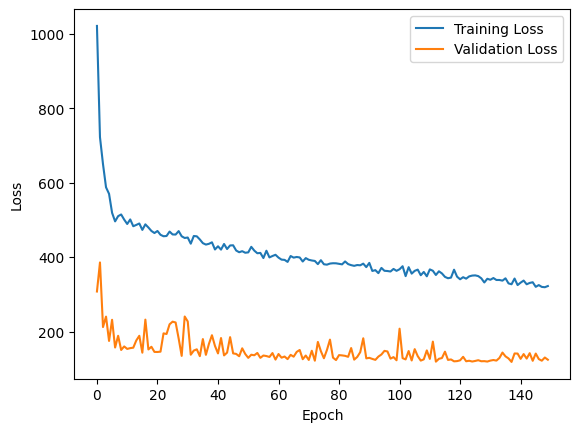

Epoch 1/150


/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1427.4882 - mae: 28.0325 - val_loss: 319.1409 - val_mae: 13.4995
Epoch 2/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 635.1040 - mae: 19.8308 - val_loss: 300.6466 - val_mae: 13.1945
Epoch 3/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 597.5475 - mae: 18.9296 - val_loss: 304.3677 - val_mae: 13.6102
Epoch 4/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 493.4041 - mae: 17.3988 - val_loss: 285.2341 - val_mae: 13.3353
Epoch 5/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 487.7473 - mae: 17.2930 - val_loss: 195.5689 - val_mae: 10.6872
Epoch 6/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 453.4216 - mae: 16.4359 - val_loss: 191.4865 - val_mae: 10.6018
Epoch 7/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 477.0499 - mae: 16.8368 - val_loss: 156.8180 - val_mae: 9.4541
Epoch 8/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 427.9731 - mae: 16.1805 - val_loss: 161.8499 - val_mae: 9.6920
Epoch 9/150
3

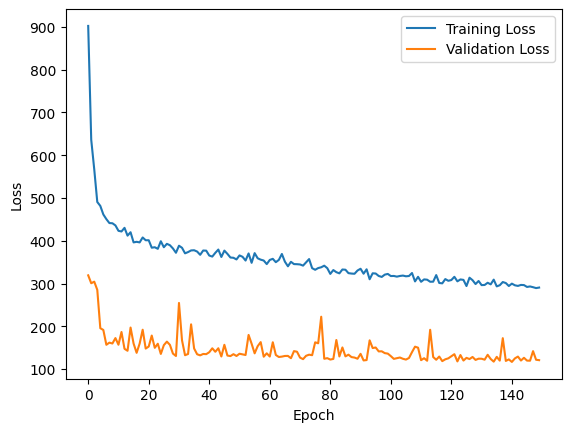

Epoch 1/150


/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1471.6700 - mae: 28.0389 - val_loss: 308.4289 - val_mae: 13.1625
Epoch 2/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 617.3210 - mae: 19.4016 - val_loss: 267.5706 - val_mae: 12.3400
Epoch 3/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 553.6320 - mae: 18.4227 - val_loss: 220.2511 - val_mae: 11.3087
Epoch 4/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 477.7956 - mae: 17.2045 - val_loss: 204.9664 - val_mae: 10.9217
Epoch 5/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 471.8857 - mae: 16.7633 - val_loss: 233.4646 - val_mae: 12.0699
Epoch 6/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 447.8450 - mae: 16.3204 - val_loss: 186.4283 - val_mae: 10.5347
Epoch 7/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 436.4834 - mae: 16.1831 - val_loss: 179.5678 - val_mae: 10.3069
Epoch 8/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 459.3610 - mae: 16.4614 - val_loss: 176.7778 - val_mae: 10.1908
Epoch 9/150

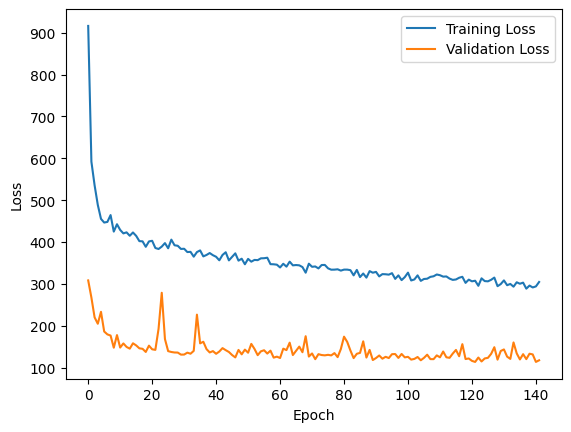

Epoch 1/150


/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1876.9222 - mae: 31.4649 - val_loss: 301.3138 - val_mae: 13.9566
Epoch 2/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 700.0141 - mae: 21.0930 - val_loss: 305.3522 - val_mae: 13.0552
Epoch 3/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 577.7161 - mae: 18.7297 - val_loss: 209.5691 - val_mae: 11.2836
Epoch 4/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 531.1990 - mae: 18.0633 - val_loss: 184.1343 - val_mae: 10.3073
Epoch 5/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 507.2228 - mae: 17.4941 - val_loss: 180.7623 - val_mae: 10.2477
Epoch 6/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 480.3583 - mae: 16.8652 - val_loss: 208.8700 - val_mae: 11.0452
Epoch 7/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 438.1623 - mae: 16.4411 - val_loss: 147.5519 - val_mae: 8.9900
Epoch 8/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 443.8482 - mae: 16.3388 - val_loss: 152.4628 - val_mae: 9.1495
Epoch 9/150
3

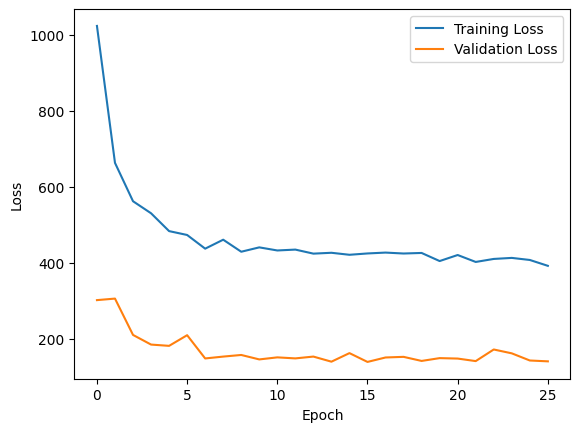


Summary of Results:
Patience 40: Loss = 118.5138, MAE = 8.0349, Early Stopping Occurred: False, Early Stopping Epoch: None
Patience 30: Loss = 116.7564, MAE = 7.8032, Early Stopping Occurred: False, Early Stopping Epoch: None
Patience 20: Loss = 113.8299, MAE = 7.6948, Early Stopping Occurred: True, Early Stopping Epoch: 141
Patience 10: Loss = 138.4038, MAE = 8.6944, Early Stopping Occurred: True, Early Stopping Epoch: 25


In [29]:
# Patience 값 리스트
patience_values = [40, 30, 20, 10]

# 결과 저장을 위한 리스트
results150_16 = []

for patience in patience_values:
    # 1D CNN 모델 정의 (회귀용)
    sbp_model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_combined.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Conv1D(filters=32, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(100, activation='relu'),
        Dropout(0.5),
        Dense(1)  # 회귀 문제이므로 활성화 함수 없음
    ])

    # 모델 컴파일
    sbp_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    # 콜백 설정
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint('best_model_{}.keras'.format(patience), monitor='val_loss', save_best_only=True)

    # 모델 학습
    history = sbp_model.fit(
        X_train_combined, SBP_Y_train_combined,
        epochs=150,
        batch_size=16,
        validation_data=(X_test_combined, SBP_Y_test_combined),
        callbacks=[early_stopping, model_checkpoint]
    )

    # Early stopping 여부와 발생한 epoch 저장
    early_stopping_occurred = early_stopping.stopped_epoch > 0
    early_stopping_epoch = early_stopping.stopped_epoch if early_stopping_occurred else None

    # Early stopping 여부 확인 및 출력
    if early_stopping_occurred:
        print(f"Patience {patience}: Early stopping occurred at epoch {early_stopping_epoch}")
    else:
        print(f"Patience {patience}: Early stopping did not occur")

    # 검증 데이터로 모델 평가
    val_loss, val_mae = sbp_model.evaluate(X_test_combined, SBP_Y_test_combined)
    print(f"Patience {patience}: Validation MAE: {val_mae:.2f}")
    print(f"Patience {patience}: Validation Loss: {val_loss:.2f}")

    # 결과 저장
    results150_16.append({
        'patience': patience,
        'val_loss': val_loss,
        'val_mae': val_mae,
        'early_stopping_occurred': early_stopping_occurred,
        'early_stopping_epoch': early_stopping_epoch
    })

    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# 최종 결과 확인
print("\nSummary of Results:")
for result in results150_16:
    print(f"Patience {result['patience']}: Loss = {result['val_loss']:.4f}, MAE = {result['val_mae']:.4f}, "
          f"Early Stopping Occurred: {result['early_stopping_occurred']}, "
          f"Early Stopping Epoch: {result['early_stopping_epoch'] if result['early_stopping_occurred'] is not None else 'N/A'}")


Epoch 1/200


/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2280.1377 - mae: 33.8386 - val_loss: 333.7203 - val_mae: 14.0134
Epoch 2/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 792.8716 - mae: 22.2560 - val_loss: 340.1787 - val_mae: 13.8134
Epoch 3/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 768.9003 - mae: 21.5037 - val_loss: 272.3614 - val_mae: 13.1152
Epoch 4/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 727.7990 - mae: 21.3326 - val_loss: 242.8689 - val_mae: 12.2463
Epoch 5/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 709.6664 - mae: 20.9471 - val_loss: 231.8986 - val_mae: 12.0533
Epoch 6/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 692.4095 - mae: 20.6968 - val_loss: 208.5451 - val_mae: 11.1042
Epoch 7/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 667.1035 - mae: 20.3108 - val_loss: 197.4448 - val_mae: 10.7540
Epoch 8/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 653.3976 - mae: 20.0144 - val_loss: 225.4375 - val_mae: 11.6645
Epoch 9/200

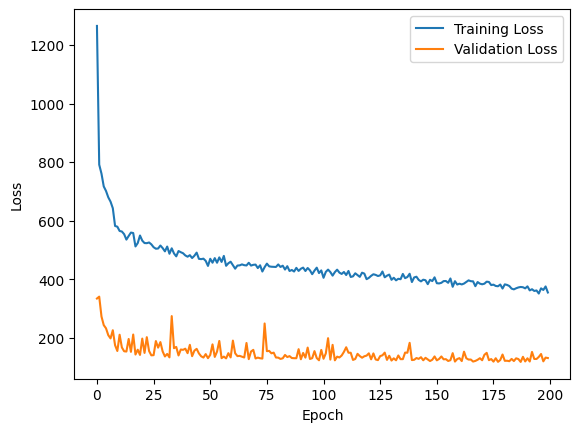

Epoch 1/200


/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1780.9294 - mae: 30.0941 - val_loss: 469.2223 - val_mae: 15.9226
Epoch 2/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 666.9417 - mae: 20.3434 - val_loss: 285.4787 - val_mae: 14.0959
Epoch 3/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 580.7516 - mae: 19.0815 - val_loss: 253.1896 - val_mae: 12.0590
Epoch 4/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 549.6131 - mae: 18.4212 - val_loss: 229.7599 - val_mae: 11.4688
Epoch 5/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 528.1552 - mae: 17.9181 - val_loss: 178.8627 - val_mae: 10.0890
Epoch 6/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 502.8707 - mae: 17.3966 - val_loss: 165.9799 - val_mae: 9.6128
Epoch 7/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 463.1499 - mae: 16.7243 - val_loss: 169.5728 - val_mae: 9.8497
Epoch 8/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 451.9594 - mae: 16.6652 - val_loss: 160.6791 - val_mae: 9.5079
Epoch 9/200
18

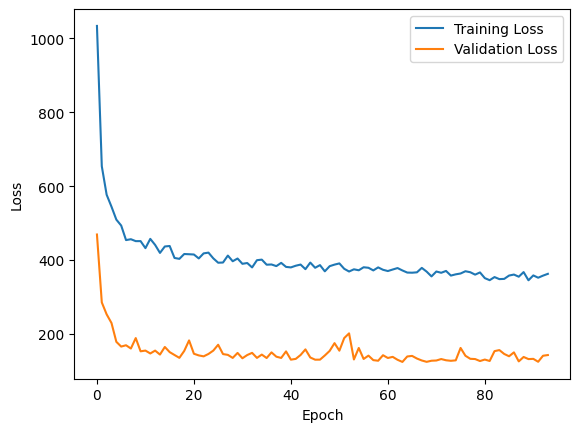

Epoch 1/200


/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1484.3425 - mae: 28.5188 - val_loss: 329.4319 - val_mae: 13.7714
Epoch 2/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 671.6348 - mae: 20.3293 - val_loss: 341.6189 - val_mae: 13.7335
Epoch 3/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 648.0273 - mae: 19.9921 - val_loss: 249.4077 - val_mae: 12.3803
Epoch 4/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 577.8306 - mae: 18.9335 - val_loss: 221.7703 - val_mae: 11.4078
Epoch 5/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 556.2218 - mae: 18.1150 - val_loss: 288.4288 - val_mae: 13.1034
Epoch 6/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 516.1014 - mae: 17.6453 - val_loss: 291.9362 - val_mae: 13.4818
Epoch 7/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 523.0342 - mae: 17.9857 - val_loss: 157.5112 - val_mae: 9.4688
Epoch 8/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 502.1405 - mae: 17.5322 - val_loss: 365.0597 - val_mae: 15.9818
Epoch 9/200


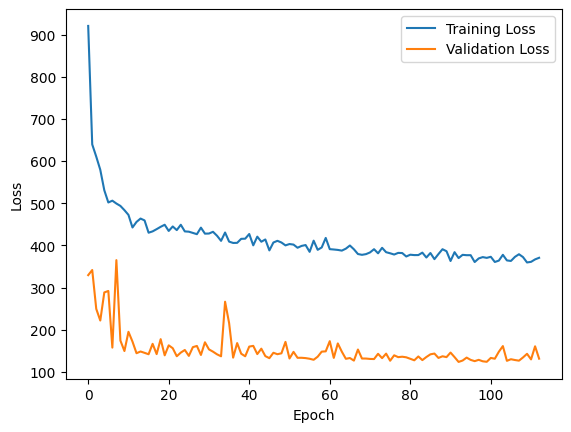

Epoch 1/200


/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2469.4231 - mae: 34.9748 - val_loss: 322.8975 - val_mae: 14.1710
Epoch 2/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 760.2532 - mae: 21.4333 - val_loss: 298.2663 - val_mae: 14.4489
Epoch 3/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 674.2451 - mae: 20.4736 - val_loss: 253.5808 - val_mae: 12.9036
Epoch 4/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 641.0300 - mae: 19.7687 - val_loss: 226.6847 - val_mae: 11.5087
Epoch 5/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 609.6844 - mae: 19.2927 - val_loss: 194.5122 - val_mae: 10.5786
Epoch 6/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 533.8214 - mae: 18.1938 - val_loss: 237.7348 - val_mae: 11.8809
Epoch 7/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 514.7145 - mae: 17.6939 - val_loss: 177.1712 - val_mae: 10.1634
Epoch 8/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 513.1375 - mae: 17.6712 - val_loss: 162.3161 - val_mae: 9.6269
Epoch 9/200


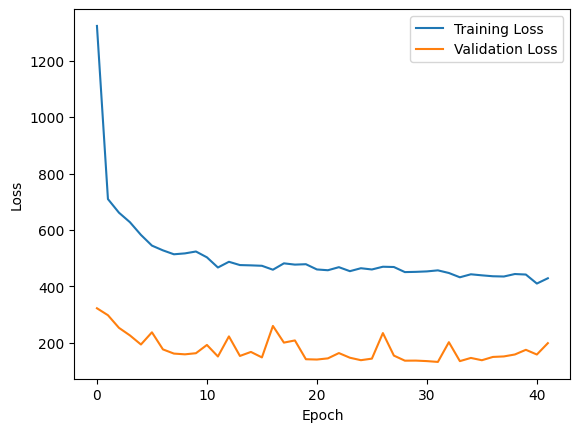


Summary of Results:
Patience 40: Loss = 117.0957, MAE = 7.9254, Early Stopping Occurred: False, Early Stopping Epoch: None
Patience 30: Loss = 124.4492, MAE = 8.1072, Early Stopping Occurred: True, Early Stopping Epoch: 93
Patience 20: Loss = 123.5643, MAE = 8.1035, Early Stopping Occurred: True, Early Stopping Epoch: 112
Patience 10: Loss = 132.8055, MAE = 8.4746, Early Stopping Occurred: True, Early Stopping Epoch: 41


In [30]:
# Patience 값 리스트
patience_values = [40, 30, 20, 10]

# 결과 저장을 위한 리스트
results200 = []

for patience in patience_values:
    # 1D CNN 모델 정의 (회귀용)
    sbp_model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_combined.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Conv1D(filters=32, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(100, activation='relu'),
        Dropout(0.5),
        Dense(1)  # 회귀 문제이므로 활성화 함수 없음
    ])

    # 모델 컴파일
    sbp_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    # 콜백 설정
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint('best_model_{}.keras'.format(patience), monitor='val_loss', save_best_only=True)

    # 모델 학습
    history = sbp_model.fit(
        X_train_combined, SBP_Y_train_combined,
        epochs=200,
        batch_size=32,
        validation_data=(X_test_combined, SBP_Y_test_combined),
        callbacks=[early_stopping, model_checkpoint]
    )

    # Early stopping 여부와 발생한 epoch 저장
    early_stopping_occurred = early_stopping.stopped_epoch > 0
    early_stopping_epoch = early_stopping.stopped_epoch if early_stopping_occurred else None

    # Early stopping 여부 확인 및 출력
    if early_stopping_occurred:
        print(f"Patience {patience}: Early stopping occurred at epoch {early_stopping_epoch}")
    else:
        print(f"Patience {patience}: Early stopping did not occur")

    # 검증 데이터로 모델 평가
    val_loss, val_mae = sbp_model.evaluate(X_test_combined, SBP_Y_test_combined)
    print(f"Patience {patience}: Validation MAE: {val_mae:.2f}")
    print(f"Patience {patience}: Validation Loss: {val_loss:.2f}")

    # 결과 저장
    results200.append({
        'patience': patience,
        'val_loss': val_loss,
        'val_mae': val_mae,
        'early_stopping_occurred': early_stopping_occurred,
        'early_stopping_epoch': early_stopping_epoch
    })

    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# 최종 결과 확인
print("\nSummary of Results:")
for result in results200:
    print(f"Patience {result['patience']}: Loss = {result['val_loss']:.4f}, MAE = {result['val_mae']:.4f}, "
          f"Early Stopping Occurred: {result['early_stopping_occurred']}, "
          f"Early Stopping Epoch: {result['early_stopping_epoch'] if result['early_stopping_occurred'] is not None else 'N/A'}")


In [32]:
# Patience 값 리스트
patience_values = [40, 30, 20, 10]

# 결과 저장을 위한 리스트
results200_16 = []

for patience in patience_values:
    # 1D CNN 모델 정의 (회귀용)
    sbp_model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_combined.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Conv1D(filters=32, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(100, activation='relu'),
        Dropout(0.5),
        Dense(1)  # 회귀 문제이므로 활성화 함수 없음
    ])

    # 모델 컴파일
    sbp_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    # 콜백 설정
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint('best_model_{}.keras'.format(patience), monitor='val_loss', save_best_only=True)

    # 모델 학습
    history = sbp_model.fit(
        X_train_combined, SBP_Y_train_combined,
        epochs=200,
        batch_size=16,
        validation_data=(X_test_combined, SBP_Y_test_combined),
        callbacks=[early_stopping, model_checkpoint]
    )

    # Early stopping 여부와 발생한 epoch 저장
    early_stopping_occurred = early_stopping.stopped_epoch > 0
    early_stopping_epoch = early_stopping.stopped_epoch if early_stopping_occurred else None

    # Early stopping 여부 확인 및 출력
    if early_stopping_occurred:
        print(f"Patience {patience}: Early stopping occurred at epoch {early_stopping_epoch}")
    else:
        print(f"Patience {patience}: Early stopping did not occur")

    # 검증 데이터로 모델 평가
    val_loss, val_mae = sbp_model.evaluate(X_test_combined, SBP_Y_test_combined)
    print(f"Patience {patience}: Validation MAE: {val_mae:.2f}")
    print(f"Patience {patience}: Validation Loss: {val_loss:.2f}")

    # 결과 저장
    results200_16.append({
        'patience': patience,
        'val_loss': val_loss,
        'val_mae': val_mae,
        'early_stopping_occurred': early_stopping_occurred,
        'early_stopping_epoch': early_stopping_epoch
    })

    # plt.plot(history.history['loss'], label='Training Loss')
    # plt.plot(history.history['val_loss'], label='Validation Loss')
    # plt.xlabel('Epoch')
    # plt.ylabel('Loss')
    # plt.legend()
    # plt.show()

# 최종 결과 확인
print("\nSummary of Results:")
for result in results200_16:
    print(f"Patience {result['patience']}: Loss = {result['val_loss']:.4f}, MAE = {result['val_mae']:.4f}, "
          f"Early Stopping Occurred: {result['early_stopping_occurred']}, "
          f"Early Stopping Epoch: {result['early_stopping_epoch'] if result['early_stopping_occurred'] is not None else 'N/A'}")


Epoch 1/200


/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1326.9725 - mae: 26.0326 - val_loss: 407.7220 - val_mae: 15.0373
Epoch 2/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 671.6589 - mae: 20.3963 - val_loss: 264.8920 - val_mae: 12.4135
Epoch 3/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 599.0610 - mae: 19.3789 - val_loss: 271.8876 - val_mae: 12.7197
Epoch 4/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 541.2142 - mae: 18.3257 - val_loss: 181.1248 - val_mae: 10.2274
Epoch 5/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 545.9890 - mae: 18.3693 - val_loss: 178.5707 - val_mae: 10.2198
Epoch 6/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 506.6088 - mae: 17.5804 - val_loss: 164.3987 - val_mae: 9.6851
Epoch 7/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 507.8036 - mae: 17.6806 - val_loss: 157.2042 - val_mae: 9.4679
Epoch 8/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 514.5306 - mae: 17.8330 - val_loss: 151.1375 - val_mae: 9.2807
Epoch 9/200
37

/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1755.4409 - mae: 29.8514 - val_loss: 329.5398 - val_mae: 13.6144
Epoch 2/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 715.9340 - mae: 21.1428 - val_loss: 346.0937 - val_mae: 14.0846
Epoch 3/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 642.3780 - mae: 19.8750 - val_loss: 289.3479 - val_mae: 13.0833
Epoch 4/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 583.1179 - mae: 18.8183 - val_loss: 217.5075 - val_mae: 11.2261
Epoch 5/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 567.1828 - mae: 18.7257 - val_loss: 174.3994 - val_mae: 10.0911
Epoch 6/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 556.0081 - mae: 18.5033 - val_loss: 250.2449 - val_mae: 12.6708
Epoch 7/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 497.4345 - mae: 17.2669 - val_loss: 159.1261 - val_mae: 9.5237
Epoch 8/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 471.8453 - mae: 17.0458 - val_loss: 232.3380 - val_mae: 11.7501
Epoch 9/200


/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1453.4878 - mae: 27.5580 - val_loss: 301.6918 - val_mae: 14.1763
Epoch 2/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 654.7042 - mae: 20.1371 - val_loss: 274.0699 - val_mae: 12.5482
Epoch 3/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 594.3589 - mae: 19.2674 - val_loss: 337.2776 - val_mae: 14.8424
Epoch 4/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 567.3464 - mae: 18.5706 - val_loss: 335.3583 - val_mae: 14.8036
Epoch 5/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 529.0861 - mae: 17.9497 - val_loss: 331.9826 - val_mae: 14.8659
Epoch 6/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 502.6420 - mae: 17.5138 - val_loss: 294.1281 - val_mae: 13.8278
Epoch 7/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 498.3151 - mae: 17.1947 - val_loss: 185.0035 - val_mae: 10.4777
Epoch 8/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 553.1586 - mae: 18.2802 - val_loss: 222.3258 - val_mae: 11.7908
Epoch 9/200

/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1359.9202 - mae: 26.9129 - val_loss: 318.8089 - val_mae: 13.4083
Epoch 2/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 649.6913 - mae: 20.1035 - val_loss: 318.6735 - val_mae: 13.3291
Epoch 3/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 580.8163 - mae: 19.0514 - val_loss: 251.5787 - val_mae: 11.9909
Epoch 4/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 564.8448 - mae: 18.4923 - val_loss: 186.4016 - val_mae: 10.4343
Epoch 5/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 529.0750 - mae: 18.1833 - val_loss: 265.9392 - val_mae: 13.2410
Epoch 6/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 482.3876 - mae: 17.2004 - val_loss: 166.9538 - val_mae: 9.8329
Epoch 7/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 459.2863 - mae: 16.8415 - val_loss: 181.0487 - val_mae: 10.0629
Epoch 8/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 482.2558 - mae: 17.1458 - val_loss: 198.8513 - val_mae: 10.9180
Epoch 9/200


## 1D CNN SBP (filter alternated)
### First Conv1D filters 128
-> epoch 50, batch-size = 32
- Patience 40: Loss = 135.2585, MAE = 8.6710
- Patience 30: Loss = 130.4749, MAE = 8.3256
- Patience 20: Loss = 128.1490, MAE = 8.2887
- Patience 10: Loss = 135.8297, MAE = 8.6428, Early Stopping Epoch: 34

### First Conv1D filters 128
-> epoch 60, batch-size = 32
- Patience 40: Loss = 129.1048, MAE = 8.4466
- Patience 30: Loss = 128.1865, MAE = 8.2143
- Patience 20: Loss = 131.2920, MAE = 8.5060
- Patience 10: Loss = 136.4874, MAE = 8.6103, Early Stopping Epoch: 46

### First Conv1D filters 128
-> epoch 100, batch-size = 32
- Patience 40: Loss = 124.6289, MAE = 8.0537
- Patience 30: Loss = 128.4817, MAE = 8.3647
- Patience 20: Loss = 125.3785, MAE = 8.2437
- Patience 10: Loss = 134.1710, MAE = 8.5108, Early Stopping Epoch: 44

### First Conv1D filters 128
-> epoch 150, batch-size = 16
- Patience 40: Loss = 118.8970, MAE = 7.9755
- Patience 30: Loss = 118.3266, MAE = 7.9201
- Patience 20: Loss = 117.4870, MAE = 7.8967
- Patience 10: Loss = 130.7383, MAE = 8.4441, Early Stopping Epoch: 50


### First Conv1D filters 128
-> epoch 150, batch-size = 32
- Patience 40: Loss = 119.0548, MAE = 8.0408
- Patience 30: Loss = 117.4382, MAE = 7.8401
- Patience 20: Loss = 117.6743, MAE = 7.8894
- Patience 10: Loss = 131.9274, MAE = 8.4349, Early Stopping Epoch: 55

In [16]:
# Patience 값 리스트
patience_values = [40, 30, 20, 10]

# 결과 저장을 위한 리스트
results = []

for patience in patience_values:
    # 1D CNN 모델 정의 (회귀용)
    sbp_model = Sequential([
        Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(X_train_combined.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Conv1D(filters=32, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(100, activation='relu'),
        Dropout(0.5),
        Dense(1)  # 회귀 문제이므로 활성화 함수 없음
    ])

    # 모델 컴파일
    sbp_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    # 콜백 설정
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint('best_model_{}.keras'.format(patience), monitor='val_loss', save_best_only=True)

    # 모델 학습
    history = sbp_model.fit(
        X_train_combined, SBP_Y_train_combined,
        epochs=150,
        batch_size=16,
        validation_data=(X_test_combined, SBP_Y_test_combined),
        callbacks=[early_stopping, model_checkpoint]
    )

    # Early stopping 여부와 발생한 epoch 저장
    early_stopping_occurred = early_stopping.stopped_epoch > 0
    early_stopping_epoch = early_stopping.stopped_epoch if early_stopping_occurred else None

    # Early stopping 여부 확인 및 출력
    if early_stopping_occurred:
        print(f"Patience {patience}: Early stopping occurred at epoch {early_stopping_epoch}")
    else:
        print(f"Patience {patience}: Early stopping did not occur")

    # 검증 데이터로 모델 평가
    val_loss, val_mae = sbp_model.evaluate(X_test_combined, SBP_Y_test_combined)
    print(f"Patience {patience}: Validation MAE: {val_mae:.2f}")
    print(f"Patience {patience}: Validation Loss: {val_loss:.2f}")

    # 결과 저장
    results.append({
        'patience': patience,
        'val_loss': val_loss,
        'val_mae': val_mae,
        'early_stopping_occurred': early_stopping_occurred,
        'early_stopping_epoch': early_stopping_epoch
    })

# 최종 결과 확인
print("\nSummary of Results:")
for result in results:
    print(f"Patience {result['patience']}: Loss = {result['val_loss']:.4f}, MAE = {result['val_mae']:.4f}, "
          f"Early Stopping Occurred: {result['early_stopping_occurred']}, "
          f"Early Stopping Epoch: {result['early_stopping_epoch'] if result['early_stopping_occurred'] is not None else 'N/A'}")


/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1875.5660 - mae: 31.5802 - val_loss: 309.5373 - val_mae: 14.6892
Epoch 2/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 698.1579 - mae: 20.7916 - val_loss: 302.7098 - val_mae: 13.1213
Epoch 3/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 614.0500 - mae: 19.5204 - val_loss: 244.2964 - val_mae: 11.9696
Epoch 4/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 579.6587 - mae: 18.7916 - val_loss: 299.3297 - val_mae: 14.1951
Epoch 5/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 556.0301 - mae: 18.4602 - val_loss: 198.5897 - val_mae: 10.7957
Epoch 6/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 540.2421 - mae: 18.1067 - val_loss: 169.5541 - val_mae: 9.8953
Epoch 7/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 493.7838 - mae: 17.4459 - val_loss: 204.1609 - val_mae: 11.2459
Epoch 8/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 494.6828 - mae: 17.2418 - val_loss: 158.1351 - val_mae: 9.4777
E

/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1772.0265 - mae: 30.2557 - val_loss: 314.8136 - val_mae: 13.3434
Epoch 2/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 679.1856 - mae: 20.3728 - val_loss: 268.9735 - val_mae: 13.3128
Epoch 3/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 593.3663 - mae: 19.1021 - val_loss: 192.5931 - val_mae: 10.7536
Epoch 4/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 577.5630 - mae: 18.4240 - val_loss: 184.8130 - val_mae: 10.3772
Epoch 5/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 525.6070 - mae: 18.1174 - val_loss: 187.5832 - val_mae: 10.6065
Epoch 6/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 509.1122 - mae: 17.8284 - val_loss: 201.3905 - val_mae: 10.7799
Epoch 7/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 532.9263 - mae: 17.9885 - val_loss: 209.1782 - val_mae: 11.4608
Epoch 8/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 499.9602 - mae: 17.6398 - val_loss: 154.0854 - val_mae: 9.4480
Epoch 9/150


/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


374/374 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1913.3014 - mae: 31.0453 - val_loss: 311.9320 - val_mae: 14.8257
Epoch 2/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 765.7222 - mae: 21.7963 - val_loss: 351.9281 - val_mae: 14.0261
Epoch 3/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 699.0012 - mae: 20.7592 - val_loss: 283.9271 - val_mae: 13.8404
Epoch 4/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 639.6608 - mae: 19.8217 - val_loss: 273.2759 - val_mae: 12.7244
Epoch 5/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 603.6207 - mae: 19.2064 - val_loss: 213.1069 - val_mae: 11.0793
Epoch 6/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 576.0417 - mae: 18.5261 - val_loss: 176.2230 - val_mae: 10.1595
Epoch 7/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 546.8146 - mae: 18.1097 - val_loss: 334.7170 - val_mae: 14.9380
Epoch 8/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 582.3268 - mae: 18.8281 - val_loss: 162.9467 - val_mae: 9.6039
Epoch 9/150


/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1968.0140 - mae: 31.9293 - val_loss: 308.9862 - val_mae: 13.8666
Epoch 2/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 685.0306 - mae: 20.5327 - val_loss: 286.6033 - val_mae: 12.8102
Epoch 3/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 602.8105 - mae: 19.5079 - val_loss: 262.7140 - val_mae: 12.3512
Epoch 4/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 544.0157 - mae: 18.4445 - val_loss: 191.0160 - val_mae: 10.5308
Epoch 5/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 537.7246 - mae: 18.2550 - val_loss: 165.6789 - val_mae: 9.6822
Epoch 6/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 492.8190 - mae: 17.4640 - val_loss: 167.8389 - val_mae: 9.6424
Epoch 7/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 478.9391 - mae: 17.1389 - val_loss: 179.9322 - val_mae: 10.0215
Epoch 8/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 475.0059 - mae: 16.9388 - val_loss: 158.8587 - val_mae: 9.2495
Epoch 9/150
37

## 1D CNN for DBP

### Early stopping (patience)
-> epoch 50, batch-size = 16
- Patience 40: Loss = 57.1890, MAE = 5.3846
- Patience 30: Loss = 56.7720, MAE = 5.4701
- Patience 20: Loss = 54.8869, MAE = 5.2500
- Patience 10: Loss = 55.6157, MAE = 5.3538, Early Stopping Epoch: 41

### Early stopping (patience)
-> epoch 50, batch-size = 32
- Patience 40: Loss = 56.0244, MAE = 5.3419
- Patience 30: Loss = 56.2613, MAE = 5.3335
- Patience 20: Loss = 56.3914, MAE = 5.3639
- Patience 10: Loss = 59.6671, MAE = 5.6499, Early Stopping Epoch: 23

### Early stopping (patience)
-> epoch 100, batch-size = 16
- Patience 40: Loss = 52.7448, MAE = 5.2128
- Patience 30: Loss = 53.8743, MAE = 5.2439
- Patience 20: Loss = 53.5456, MAE = 5.2462
- Patience 10: Loss = 59.9646, MAE = 5.5666, Early Stopping Epoch: 30

### Early stopping (patience)
-> epoch 100, batch-size = 32
- Patience 40: Loss = 54.1577, MAE = 5.2251
- Patience 30: Loss = 54.3697, MAE = 5.2682
- Patience 20: Loss = 53.3733, MAE = 5.1637
- Patience 10: Loss = 55.4956, MAE = 5.3511, Early Stopping Epoch: 78

### Early stopping (patience)
-> epoch 150, batch-size = 16
- Patience 40: Loss = 52.5120, MAE = 5.1191
- Patience 30: Loss = 53.1025, MAE = 5.1688, Early Stopping Epoch: 137
- Patience 20: Loss = 52.1628, MAE = 5.1445, Early Stopping Epoch: 136
- Patience 10: Loss = 58.3427, MAE = 5.5590, Early Stopping Epoch: 29

### Early stopping (patience)
-> epoch 150, batch-size = 32
- Patience 40: Loss = 51.1310, MAE = 5.0696
- Patience 30: Loss = 54.8134, MAE = 5.2679, Early Stopping Epoch: 76
- Patience 20: Loss = 58.3394, MAE = 5.4970, Early Stopping Epoch: 45
- Patience 10: Loss = 58.4436, MAE = 5.5170, Early Stopping Epoch: 28

### Early stopping (patience)
-> epoch 200, batch-size = 16
- Patience 40: Loss = 51.5722, MAE = 5.0560, Early Stopping Epoch: 113
- Patience 30: Loss = 52.3869, MAE = 5.1304, Early Stopping Epoch: 147
- Patience 20: Loss = 52.9575, MAE = 5.1575, Early Stopping Epoch: 99
- Patience 10: Loss = 57.1061, MAE = 5.3802, Early Stopping Epoch: 30

### Early stopping (patience)
-> epoch 200, batch-size = 32
- Patience 40: Loss = 49.1604, MAE = 4.9449
- Patience 30: Loss = 52.1515, MAE = 5.1085, Early Stopping Epoch: 161
- Patience 20: Loss = 53.2336, MAE = 5.2543, Early Stopping Epoch: 122
- Patience 10: Loss = 55.8708, MAE = 5.3361, Early Stopping Epoch: 54

In [44]:
# Patience 값 리스트
patience_values = [40, 30, 20, 10]

# 결과 저장을 위한 리스트
bresults50 = []

for patience in patience_values:
    # 1D CNN 모델 정의 (회귀용)
    dbp_model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_combined.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Conv1D(filters=32, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(100, activation='relu'),
        Dropout(0.5),
        Dense(1)  # 회귀 문제이므로 활성화 함수 없음
    ])

    # 모델 컴파일
    dbp_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    # 콜백 설정
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint(f'best_model_{patience}.keras', monitor='val_loss', save_best_only=True)

    # 모델 학습
    history = dbp_model.fit(
        X_train_combined, DBP_Y_train_combined,
        epochs=50,
        batch_size=16,
        validation_data=(X_test_combined, DBP_Y_test_combined),
        callbacks=[early_stopping, model_checkpoint]
    )

    # Early stopping 여부와 발생한 epoch 저장
    early_stopping_occurred = early_stopping.stopped_epoch > 0
    early_stopping_epoch = early_stopping.stopped_epoch if early_stopping_occurred else None

    # Early stopping 여부 확인 및 출력
    if early_stopping_occurred:
        print(f"Patience {patience}: Early stopping occurred at epoch {early_stopping_epoch}")
    else:
        print(f"Patience {patience}: Early stopping did not occur")

    # 검증 데이터로 모델 평가
    val_loss, val_mae = dbp_model.evaluate(X_test_combined, DBP_Y_test_combined)
    print(f"Patience {patience}: Validation MAE: {val_mae:.2f}")
    print(f"Patience {patience}: Validation Loss: {val_loss:.2f}")

    # 결과 저장
    bresults50.append({
        'patience': patience,
        'val_loss': val_loss,
        'val_mae': val_mae,
        'early_stopping_occurred': early_stopping_occurred,
        'early_stopping_epoch': early_stopping_epoch
    })

    # 학습 및 검증 손실 그래프 시각화
    # plt.plot(history.history['loss'], label='Training Loss')
    # plt.plot(history.history['val_loss'], label='Validation Loss')
    # plt.xlabel('Epoch')
    # plt.ylabel('Loss')
    # plt.legend()
    # plt.title(f'Patience = {patience}')
    # plt.show()

# 최종 결과 확인
print("\nSummary of Results:")
for result in bresults50:
    print(f"Patience {result['patience']}: Loss = {result['val_loss']:.4f}, MAE = {result['val_mae']:.4f}, "
          f"Early Stopping Occurred: {result['early_stopping_occurred']}, "
          f"Early Stopping Epoch: {result['early_stopping_epoch'] if result['early_stopping_occurred'] is not None else 'N/A'}")


Epoch 1/50


/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 859.4346 - mae: 18.4320 - val_loss: 168.6546 - val_mae: 9.5579
Epoch 2/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 236.7228 - mae: 12.0242 - val_loss: 161.6131 - val_mae: 9.3401
Epoch 3/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 217.1088 - mae: 11.4376 - val_loss: 89.4234 - val_mae: 7.2411
Epoch 4/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 185.1796 - mae: 10.5732 - val_loss: 91.7165 - val_mae: 7.6644
Epoch 5/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 182.8268 - mae: 10.5121 - val_loss: 98.4073 - val_mae: 7.3608
Epoch 6/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 178.4524 - mae: 10.3355 - val_loss: 77.6180 - val_mae: 6.5033
Epoch 7/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 183.1896 - mae: 10.4701 - val_loss: 81.3565 - val_mae: 6.8569
Epoch 8/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 163.8319 - mae: 9.9569 - val_loss: 104.0288 - val_mae: 7.8051
Epoch 9/50
374/374 ━━━━━━━━━━━━━━

/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


374/374 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 907.1143 - mae: 19.2896 - val_loss: 145.8339 - val_mae: 9.9210
Epoch 2/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 263.7732 - mae: 12.7030 - val_loss: 126.8291 - val_mae: 8.4272
Epoch 3/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 225.3468 - mae: 11.7867 - val_loss: 104.6447 - val_mae: 8.6132
Epoch 4/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 191.7137 - mae: 10.7900 - val_loss: 75.6892 - val_mae: 6.6623
Epoch 5/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 174.7609 - mae: 10.2007 - val_loss: 70.2164 - val_mae: 6.1225
Epoch 6/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 167.8706 - mae: 10.0032 - val_loss: 77.2036 - val_mae: 6.8535
Epoch 7/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 157.0975 - mae: 9.6510 - val_loss: 140.4814 - val_mae: 9.5308
Epoch 8/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 158.3886 - mae: 9.6732 - val_loss: 77.2807 - val_mae: 6.4654
Epoch 9/50
374/374 ━━━━━━━━━━━━━━

/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 810.5560 - mae: 18.6623 - val_loss: 141.9393 - val_mae: 9.7240
Epoch 2/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 257.2338 - mae: 12.5044 - val_loss: 112.6449 - val_mae: 8.1002
Epoch 3/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 196.7568 - mae: 10.8528 - val_loss: 109.1773 - val_mae: 7.6856
Epoch 4/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 189.4840 - mae: 10.5974 - val_loss: 112.5915 - val_mae: 8.9106
Epoch 5/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 169.3844 - mae: 10.0621 - val_loss: 66.3038 - val_mae: 5.8837
Epoch 6/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 160.5059 - mae: 9.6933 - val_loss: 66.0624 - val_mae: 5.9624
Epoch 7/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 154.8775 - mae: 9.6907 - val_loss: 61.9874 - val_mae: 5.7208
Epoch 8/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 149.4406 - mae: 9.4043 - val_loss: 67.3849 - val_mae: 5.9492
Epoch 9/50
374/374 ━━━━━━━━━━━━━━━

/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 674.2423 - mae: 17.4570 - val_loss: 137.8399 - val_mae: 8.9815
Epoch 2/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 219.3207 - mae: 11.5778 - val_loss: 110.7438 - val_mae: 7.6374
Epoch 3/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 204.0552 - mae: 11.1963 - val_loss: 90.3599 - val_mae: 6.7910
Epoch 4/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 179.5721 - mae: 10.3437 - val_loss: 77.1925 - val_mae: 6.3879
Epoch 5/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 169.8648 - mae: 10.0902 - val_loss: 83.3764 - val_mae: 6.6766
Epoch 6/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 160.2321 - mae: 9.7672 - val_loss: 65.5455 - val_mae: 5.9919
Epoch 7/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 156.2637 - mae: 9.6555 - val_loss: 63.8045 - val_mae: 5.7586
Epoch 8/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 139.3345 - mae: 9.1705 - val_loss: 60.6891 - val_mae: 5.6655
Epoch 9/50
374/374 ━━━━━━━━━━━━━━━━━

In [45]:
# Patience 값 리스트
patience_values = [40, 30, 20, 10]

# 결과 저장을 위한 리스트
bresults50_1 = []

for patience in patience_values:
    # 1D CNN 모델 정의 (회귀용)
    dbp_model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_combined.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Conv1D(filters=32, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(100, activation='relu'),
        Dropout(0.5),
        Dense(1)  # 회귀 문제이므로 활성화 함수 없음
    ])

    # 모델 컴파일
    dbp_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    # 콜백 설정
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint(f'best_model_{patience}.keras', monitor='val_loss', save_best_only=True)

    # 모델 학습
    history = dbp_model.fit(
        X_train_combined, DBP_Y_train_combined,
        epochs=50,
        batch_size=32,
        validation_data=(X_test_combined, DBP_Y_test_combined),
        callbacks=[early_stopping, model_checkpoint]
    )

    # Early stopping 여부와 발생한 epoch 저장
    early_stopping_occurred = early_stopping.stopped_epoch > 0
    early_stopping_epoch = early_stopping.stopped_epoch if early_stopping_occurred else None

    # Early stopping 여부 확인 및 출력
    if early_stopping_occurred:
        print(f"Patience {patience}: Early stopping occurred at epoch {early_stopping_epoch}")
    else:
        print(f"Patience {patience}: Early stopping did not occur")

    # 검증 데이터로 모델 평가
    val_loss, val_mae = dbp_model.evaluate(X_test_combined, DBP_Y_test_combined)
    print(f"Patience {patience}: Validation MAE: {val_mae:.2f}")
    print(f"Patience {patience}: Validation Loss: {val_loss:.2f}")

    # 결과 저장
    bresults50_1.append({
        'patience': patience,
        'val_loss': val_loss,
        'val_mae': val_mae,
        'early_stopping_occurred': early_stopping_occurred,
        'early_stopping_epoch': early_stopping_epoch
    })

    # 학습 및 검증 손실 그래프 시각화
    # plt.plot(history.history['loss'], label='Training Loss')
    # plt.plot(history.history['val_loss'], label='Validation Loss')
    # plt.xlabel('Epoch')
    # plt.ylabel('Loss')
    # plt.legend()
    # plt.title(f'Patience = {patience}')
    # plt.show()

# 최종 결과 확인
print("\nSummary of Results:")
for result in bresults50_1:
    print(f"Patience {result['patience']}: Loss = {result['val_loss']:.4f}, MAE = {result['val_mae']:.4f}, "
          f"Early Stopping Occurred: {result['early_stopping_occurred']}, "
          f"Early Stopping Epoch: {result['early_stopping_epoch'] if result['early_stopping_occurred'] is not None else 'N/A'}")


Epoch 1/50


/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 903.4009 - mae: 20.7902 - val_loss: 159.8213 - val_mae: 10.2953
Epoch 2/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 293.8080 - mae: 13.5126 - val_loss: 143.1318 - val_mae: 9.1212
Epoch 3/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 263.2870 - mae: 12.6548 - val_loss: 106.6781 - val_mae: 8.3460
Epoch 4/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 210.1910 - mae: 11.3745 - val_loss: 96.8045 - val_mae: 7.2977
Epoch 5/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 191.8613 - mae: 10.8627 - val_loss: 87.6627 - val_mae: 6.7979
Epoch 6/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 179.9329 - mae: 10.3675 - val_loss: 83.0775 - val_mae: 7.1267
Epoch 7/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 184.9284 - mae: 10.6744 - val_loss: 67.0378 - val_mae: 5.9739
Epoch 8/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 184.1646 - mae: 10.4674 - val_loss: 67.1139 - val_mae: 5.8754
Epoch 9/50
187/187 ━━━━━━━━━━━━

/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 794.3688 - mae: 19.3771 - val_loss: 162.2738 - val_mae: 9.7910
Epoch 2/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 247.6165 - mae: 12.2720 - val_loss: 163.0614 - val_mae: 9.1320
Epoch 3/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 223.4210 - mae: 11.6477 - val_loss: 108.4887 - val_mae: 8.1467
Epoch 4/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 214.8825 - mae: 11.4077 - val_loss: 97.4177 - val_mae: 7.3235
Epoch 5/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 190.8398 - mae: 10.7276 - val_loss: 95.3721 - val_mae: 7.1169
Epoch 6/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 185.5780 - mae: 10.5650 - val_loss: 105.4888 - val_mae: 7.5208
Epoch 7/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 177.3733 - mae: 10.3882 - val_loss: 71.7284 - val_mae: 6.1483
Epoch 8/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 170.7951 - mae: 10.0173 - val_loss: 67.4664 - val_mae: 5.9583
Epoch 9/50
187/187 ━━━━━━━━━━━━

/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


187/187 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 757.5181 - mae: 19.3923 - val_loss: 147.3144 - val_mae: 10.1467
Epoch 2/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 244.6834 - mae: 12.4434 - val_loss: 161.3978 - val_mae: 11.0826
Epoch 3/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 244.5115 - mae: 12.1342 - val_loss: 106.1489 - val_mae: 8.0912
Epoch 4/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 216.3358 - mae: 11.4511 - val_loss: 84.1837 - val_mae: 7.0776
Epoch 5/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 190.0571 - mae: 10.6344 - val_loss: 77.6025 - val_mae: 6.3549
Epoch 6/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 171.7010 - mae: 10.1280 - val_loss: 73.8458 - val_mae: 6.1962
Epoch 7/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 167.3613 - mae: 9.9596 - val_loss: 68.1915 - val_mae: 5.9328
Epoch 8/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 173.2169 - mae: 10.1311 - val_loss: 65.6446 - val_mae: 5.8497
Epoch 9/50
187/187 ━━━━━━━━━━━━

/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 742.2298 - mae: 17.7673 - val_loss: 159.6208 - val_mae: 10.6612
Epoch 2/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 251.8221 - mae: 12.1926 - val_loss: 120.4362 - val_mae: 8.4418
Epoch 3/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 215.7897 - mae: 11.4732 - val_loss: 113.1220 - val_mae: 7.9411
Epoch 4/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 199.3171 - mae: 11.0592 - val_loss: 82.5281 - val_mae: 7.0462
Epoch 5/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 186.3321 - mae: 10.4371 - val_loss: 71.0786 - val_mae: 6.2402
Epoch 6/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 178.1505 - mae: 10.1969 - val_loss: 77.3736 - val_mae: 6.4176
Epoch 7/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 173.4177 - mae: 10.0618 - val_loss: 66.5827 - val_mae: 5.9923
Epoch 8/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 155.7903 - mae: 9.6092 - val_loss: 65.0960 - val_mae: 6.0515
Epoch 9/50
187/187 ━━━━━━━━━━━━━

In [46]:
# Patience 값 리스트
patience_values = [40, 30, 20, 10]

# 결과 저장을 위한 리스트
bresults100 = []

for patience in patience_values:
    # 1D CNN 모델 정의 (회귀용)
    dbp_model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_combined.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Conv1D(filters=32, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(100, activation='relu'),
        Dropout(0.5),
        Dense(1)  # 회귀 문제이므로 활성화 함수 없음
    ])

    # 모델 컴파일
    dbp_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    # 콜백 설정
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint(f'best_model_{patience}.keras', monitor='val_loss', save_best_only=True)

    # 모델 학습
    history = dbp_model.fit(
        X_train_combined, DBP_Y_train_combined,
        epochs=100,
        batch_size=16,
        validation_data=(X_test_combined, DBP_Y_test_combined),
        callbacks=[early_stopping, model_checkpoint]
    )

    # Early stopping 여부와 발생한 epoch 저장
    early_stopping_occurred = early_stopping.stopped_epoch > 0
    early_stopping_epoch = early_stopping.stopped_epoch if early_stopping_occurred else None

    # Early stopping 여부 확인 및 출력
    if early_stopping_occurred:
        print(f"Patience {patience}: Early stopping occurred at epoch {early_stopping_epoch}")
    else:
        print(f"Patience {patience}: Early stopping did not occur")

    # 검증 데이터로 모델 평가
    val_loss, val_mae = dbp_model.evaluate(X_test_combined, DBP_Y_test_combined)
    print(f"Patience {patience}: Validation MAE: {val_mae:.2f}")
    print(f"Patience {patience}: Validation Loss: {val_loss:.2f}")

    # 결과 저장
    bresults100.append({
        'patience': patience,
        'val_loss': val_loss,
        'val_mae': val_mae,
        'early_stopping_occurred': early_stopping_occurred,
        'early_stopping_epoch': early_stopping_epoch
    })

    # 학습 및 검증 손실 그래프 시각화
    # plt.plot(history.history['loss'], label='Training Loss')
    # plt.plot(history.history['val_loss'], label='Validation Loss')
    # plt.xlabel('Epoch')
    # plt.ylabel('Loss')
    # plt.legend()
    # plt.title(f'Patience = {patience}')
    # plt.show()

# 최종 결과 확인
print("\nSummary of Results:")
for result in bresults100:
    print(f"Patience {result['patience']}: Loss = {result['val_loss']:.4f}, MAE = {result['val_mae']:.4f}, "
          f"Early Stopping Occurred: {result['early_stopping_occurred']}, "
          f"Early Stopping Epoch: {result['early_stopping_epoch'] if result['early_stopping_occurred'] is not None else 'N/A'}")


Epoch 1/100


/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 645.4156 - mae: 17.7561 - val_loss: 147.1665 - val_mae: 8.9166
Epoch 2/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 245.1749 - mae: 12.2677 - val_loss: 110.5828 - val_mae: 7.6382
Epoch 3/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 193.2501 - mae: 10.8388 - val_loss: 123.4006 - val_mae: 9.3237
Epoch 4/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 187.0896 - mae: 10.5879 - val_loss: 80.1286 - val_mae: 6.3860
Epoch 5/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 167.4248 - mae: 10.0138 - val_loss: 105.9951 - val_mae: 7.7294
Epoch 6/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 171.7829 - mae: 10.0689 - val_loss: 72.4689 - val_mae: 6.4383
Epoch 7/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 173.8675 - mae: 10.1129 - val_loss: 63.9397 - val_mae: 5.7463
Epoch 8/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 156.1737 - mae: 9.5931 - val_loss: 92.1189 - val_mae: 6.9683
Epoch 9/100
374/374 ━━━━━

/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 534.3429 - mae: 16.8070 - val_loss: 132.9263 - val_mae: 9.7791
Epoch 2/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 244.1353 - mae: 12.4193 - val_loss: 116.9608 - val_mae: 7.8707
Epoch 3/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 201.1733 - mae: 11.1976 - val_loss: 82.9357 - val_mae: 7.2714
Epoch 4/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 185.7084 - mae: 10.5867 - val_loss: 73.5211 - val_mae: 6.2892
Epoch 5/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 188.9635 - mae: 10.5672 - val_loss: 68.8262 - val_mae: 6.2407
Epoch 6/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 169.2564 - mae: 10.0661 - val_loss: 64.5637 - val_mae: 5.7887
Epoch 7/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 165.0732 - mae: 9.8729 - val_loss: 64.2355 - val_mae: 5.8237
Epoch 8/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 171.3374 - mae: 10.2162 - val_loss: 70.5293 - val_mae: 6.0482
Epoch 9/100
374

/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 658.6506 - mae: 17.4553 - val_loss: 145.7847 - val_mae: 9.6577
Epoch 2/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 252.1779 - mae: 12.5878 - val_loss: 118.2726 - val_mae: 7.9468
Epoch 3/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 212.1272 - mae: 11.3222 - val_loss: 102.7191 - val_mae: 7.3889
Epoch 4/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 187.8756 - mae: 10.6183 - val_loss: 73.4548 - val_mae: 6.3824
Epoch 5/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 182.7182 - mae: 10.4449 - val_loss: 74.4869 - val_mae: 6.5602
Epoch 6/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 177.3779 - mae: 10.1464 - val_loss: 71.4156 - val_mae: 6.2394
Epoch 7/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 150.5974 - mae: 9.5458 - val_loss: 71.4669 - val_mae: 6.0671
Epoch 8/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 171.4025 - mae: 10.1205 - val_loss: 102.5106 - val_mae: 7.7422
Epoch 9/100
374/374 ━━━━━

/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 715.9344 - mae: 17.6271 - val_loss: 171.1015 - val_mae: 9.5696
Epoch 2/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 267.5432 - mae: 12.8725 - val_loss: 149.5061 - val_mae: 8.8487
Epoch 3/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 217.0899 - mae: 11.4798 - val_loss: 90.7355 - val_mae: 7.5784
Epoch 4/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 189.4524 - mae: 10.7201 - val_loss: 117.7442 - val_mae: 8.8866
Epoch 5/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 178.6877 - mae: 10.3376 - val_loss: 67.5870 - val_mae: 6.1306
Epoch 6/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 168.1190 - mae: 10.0982 - val_loss: 78.2607 - val_mae: 6.7832
Epoch 7/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 170.1596 - mae: 10.1517 - val_loss: 74.6913 - val_mae: 6.2731
Epoch 8/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 160.9872 - mae: 9.7239 - val_loss: 87.7391 - val_mae: 6.9546
Epoch 9/100
374/374 ━━━━━━

In [47]:
# Patience 값 리스트
patience_values = [40, 30, 20, 10]

# 결과 저장을 위한 리스트
bresults100_1 = []

for patience in patience_values:
    # 1D CNN 모델 정의 (회귀용)
    dbp_model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_combined.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Conv1D(filters=32, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(100, activation='relu'),
        Dropout(0.5),
        Dense(1)  # 회귀 문제이므로 활성화 함수 없음
    ])

    # 모델 컴파일
    dbp_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    # 콜백 설정
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint(f'best_model_{patience}.keras', monitor='val_loss', save_best_only=True)

    # 모델 학습
    history = dbp_model.fit(
        X_train_combined, DBP_Y_train_combined,
        epochs=100,
        batch_size=32,
        validation_data=(X_test_combined, DBP_Y_test_combined),
        callbacks=[early_stopping, model_checkpoint]
    )

    # Early stopping 여부와 발생한 epoch 저장
    early_stopping_occurred = early_stopping.stopped_epoch > 0
    early_stopping_epoch = early_stopping.stopped_epoch if early_stopping_occurred else None

    # Early stopping 여부 확인 및 출력
    if early_stopping_occurred:
        print(f"Patience {patience}: Early stopping occurred at epoch {early_stopping_epoch}")
    else:
        print(f"Patience {patience}: Early stopping did not occur")

    # 검증 데이터로 모델 평가
    val_loss, val_mae = dbp_model.evaluate(X_test_combined, DBP_Y_test_combined)
    print(f"Patience {patience}: Validation MAE: {val_mae:.2f}")
    print(f"Patience {patience}: Validation Loss: {val_loss:.2f}")

    # 결과 저장
    bresults100_1.append({
        'patience': patience,
        'val_loss': val_loss,
        'val_mae': val_mae,
        'early_stopping_occurred': early_stopping_occurred,
        'early_stopping_epoch': early_stopping_epoch
    })

    # 학습 및 검증 손실 그래프 시각화
    # plt.plot(history.history['loss'], label='Training Loss')
    # plt.plot(history.history['val_loss'], label='Validation Loss')
    # plt.xlabel('Epoch')
    # plt.ylabel('Loss')
    # plt.legend()
    # plt.title(f'Patience = {patience}')
    # plt.show()

# 최종 결과 확인
print("\nSummary of Results:")
for result in bresults100_1:
    print(f"Patience {result['patience']}: Loss = {result['val_loss']:.4f}, MAE = {result['val_mae']:.4f}, "
          f"Early Stopping Occurred: {result['early_stopping_occurred']}, "
          f"Early Stopping Epoch: {result['early_stopping_epoch'] if result['early_stopping_occurred'] is not None else 'N/A'}")


Epoch 1/100


/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 555.4863 - mae: 16.9902 - val_loss: 148.9039 - val_mae: 9.6590
Epoch 2/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 268.8852 - mae: 12.8377 - val_loss: 129.1943 - val_mae: 9.6976
Epoch 3/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 227.1621 - mae: 11.8942 - val_loss: 107.2560 - val_mae: 8.3385
Epoch 4/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 205.1817 - mae: 11.0465 - val_loss: 105.8113 - val_mae: 8.3230
Epoch 5/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 211.6527 - mae: 11.2604 - val_loss: 106.1609 - val_mae: 7.5190
Epoch 6/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 193.7766 - mae: 10.8262 - val_loss: 80.3006 - val_mae: 6.6025
Epoch 7/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 171.2174 - mae: 10.2028 - val_loss: 71.5470 - val_mae: 6.2193
Epoch 8/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 168.3136 - mae: 10.1775 - val_loss: 68.2750 - val_mae: 6.0820
Epoch 9/100
187/187 ━━━

/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 630.7388 - mae: 17.8002 - val_loss: 143.7200 - val_mae: 9.2908
Epoch 2/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 281.0204 - mae: 13.1653 - val_loss: 127.8571 - val_mae: 8.3511
Epoch 3/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 248.1278 - mae: 12.3971 - val_loss: 124.0909 - val_mae: 8.0879
Epoch 4/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 229.9468 - mae: 11.8170 - val_loss: 109.9909 - val_mae: 7.5679
Epoch 5/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 210.9058 - mae: 11.3058 - val_loss: 89.3077 - val_mae: 6.8434
Epoch 6/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 196.8233 - mae: 10.9700 - val_loss: 78.1728 - val_mae: 6.6956
Epoch 7/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 193.9292 - mae: 10.7429 - val_loss: 72.3535 - val_mae: 6.5481
Epoch 8/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 196.9763 - mae: 10.8567 - val_loss: 66.2839 - val_mae: 6.0491
Epoch 9/100
187/187 ━━━━

/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 769.1782 - mae: 18.8385 - val_loss: 144.5758 - val_mae: 9.8710
Epoch 2/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 266.2803 - mae: 12.7967 - val_loss: 127.5178 - val_mae: 8.3105
Epoch 3/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 225.0550 - mae: 11.7085 - val_loss: 105.1156 - val_mae: 7.4751
Epoch 4/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 193.5658 - mae: 10.8330 - val_loss: 76.4329 - val_mae: 6.7838
Epoch 5/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 181.9833 - mae: 10.4013 - val_loss: 68.5811 - val_mae: 6.2545
Epoch 6/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 164.1637 - mae: 9.8081 - val_loss: 65.9780 - val_mae: 5.8914
Epoch 7/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 167.8354 - mae: 10.0515 - val_loss: 66.0494 - val_mae: 5.8704
Epoch 8/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 151.5596 - mae: 9.4708 - val_loss: 74.0799 - val_mae: 6.2673
Epoch 9/100
187/187 ━━━━━━━

/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1573.1506 - mae: 25.3937 - val_loss: 172.6289 - val_mae: 10.0357
Epoch 2/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 287.5920 - mae: 13.4688 - val_loss: 151.5732 - val_mae: 9.4762
Epoch 3/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 250.3113 - mae: 12.5292 - val_loss: 153.1334 - val_mae: 8.9572
Epoch 4/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 248.7108 - mae: 12.3773 - val_loss: 114.0399 - val_mae: 7.9087
Epoch 5/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 217.8877 - mae: 11.4751 - val_loss: 97.6278 - val_mae: 7.8368
Epoch 6/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 206.3486 - mae: 11.1842 - val_loss: 85.8041 - val_mae: 7.2782
Epoch 7/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 201.2691 - mae: 10.9295 - val_loss: 76.8175 - val_mae: 6.4317
Epoch 8/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 183.7799 - mae: 10.5861 - val_loss: 75.5870 - val_mae: 6.3407
Epoch 9/10

In [48]:
# Patience 값 리스트
patience_values = [40, 30, 20, 10]

# 결과 저장을 위한 리스트
bresults150 = []

for patience in patience_values:
    # 1D CNN 모델 정의 (회귀용)
    dbp_model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_combined.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Conv1D(filters=32, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(100, activation='relu'),
        Dropout(0.5),
        Dense(1)  # 회귀 문제이므로 활성화 함수 없음
    ])

    # 모델 컴파일
    dbp_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    # 콜백 설정
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint(f'best_model_{patience}.keras', monitor='val_loss', save_best_only=True)

    # 모델 학습
    history = dbp_model.fit(
        X_train_combined, DBP_Y_train_combined,
        epochs=150,
        batch_size=16,
        validation_data=(X_test_combined, DBP_Y_test_combined),
        callbacks=[early_stopping, model_checkpoint]
    )

    # Early stopping 여부와 발생한 epoch 저장
    early_stopping_occurred = early_stopping.stopped_epoch > 0
    early_stopping_epoch = early_stopping.stopped_epoch if early_stopping_occurred else None

    # Early stopping 여부 확인 및 출력
    if early_stopping_occurred:
        print(f"Patience {patience}: Early stopping occurred at epoch {early_stopping_epoch}")
    else:
        print(f"Patience {patience}: Early stopping did not occur")

    # 검증 데이터로 모델 평가
    val_loss, val_mae = dbp_model.evaluate(X_test_combined, DBP_Y_test_combined)
    print(f"Patience {patience}: Validation MAE: {val_mae:.2f}")
    print(f"Patience {patience}: Validation Loss: {val_loss:.2f}")

    # 결과 저장
    bresults150.append({
        'patience': patience,
        'val_loss': val_loss,
        'val_mae': val_mae,
        'early_stopping_occurred': early_stopping_occurred,
        'early_stopping_epoch': early_stopping_epoch
    })

    # 학습 및 검증 손실 그래프 시각화
    # plt.plot(history.history['loss'], label='Training Loss')
    # plt.plot(history.history['val_loss'], label='Validation Loss')
    # plt.xlabel('Epoch')
    # plt.ylabel('Loss')
    # plt.legend()
    # plt.title(f'Patience = {patience}')
    # plt.show()

# 최종 결과 확인
print("\nSummary of Results:")
for result in bresults150:
    print(f"Patience {result['patience']}: Loss = {result['val_loss']:.4f}, MAE = {result['val_mae']:.4f}, "
          f"Early Stopping Occurred: {result['early_stopping_occurred']}, "
          f"Early Stopping Epoch: {result['early_stopping_epoch'] if result['early_stopping_occurred'] is not None else 'N/A'}")


/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 960.2516 - mae: 19.0718 - val_loss: 131.9015 - val_mae: 8.5437
Epoch 2/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 211.8270 - mae: 11.3395 - val_loss: 110.3355 - val_mae: 7.5056
Epoch 3/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 189.5093 - mae: 10.6594 - val_loss: 76.6517 - val_mae: 6.3525
Epoch 4/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 165.0126 - mae: 9.9425 - val_loss: 126.9579 - val_mae: 8.8862
Epoch 5/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 152.3813 - mae: 9.5054 - val_loss: 99.3189 - val_mae: 7.6798
Epoch 6/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 150.9297 - mae: 9.4315 - val_loss: 66.3227 - val_mae: 5.8862
Epoch 7/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 151.0085 - mae: 9.5190 - val_loss: 64.6298 - val_mae: 5.8486
Epoch 8/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 158.3296 - mae: 9.7187 - val_loss: 68.5537 - val_mae: 5.9783
Epoch 9/150
374/37

/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 943.2968 - mae: 19.1877 - val_loss: 206.9715 - val_mae: 10.1594
Epoch 2/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 254.6236 - mae: 12.5564 - val_loss: 161.5681 - val_mae: 9.8866
Epoch 3/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 250.7625 - mae: 12.3668 - val_loss: 118.0348 - val_mae: 8.9323
Epoch 4/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 228.7723 - mae: 11.8754 - val_loss: 95.5443 - val_mae: 7.8488
Epoch 5/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 184.7767 - mae: 10.5922 - val_loss: 82.1116 - val_mae: 7.1460
Epoch 6/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 184.3400 - mae: 10.4632 - val_loss: 87.1543 - val_mae: 6.8777
Epoch 7/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 171.3210 - mae: 10.2401 - val_loss: 65.8238 - val_mae: 6.0634
Epoch 8/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 169.7846 - mae: 10.0109 - val_loss: 69.9279 - val_mae: 6.0603
Epoch 9/150
374/374 ━━━━

/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 585.6331 - mae: 17.5755 - val_loss: 148.1655 - val_mae: 10.7149
Epoch 2/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 260.3099 - mae: 12.6482 - val_loss: 109.5090 - val_mae: 8.6446
Epoch 3/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 229.2014 - mae: 11.7772 - val_loss: 93.0440 - val_mae: 7.0008
Epoch 4/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 192.0109 - mae: 10.7163 - val_loss: 68.6292 - val_mae: 6.2017
Epoch 5/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 174.4788 - mae: 10.2589 - val_loss: 107.5245 - val_mae: 7.8838
Epoch 6/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 172.1566 - mae: 10.1681 - val_loss: 65.2600 - val_mae: 5.9271
Epoch 7/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 158.7246 - mae: 9.6654 - val_loss: 147.4216 - val_mae: 9.6407
Epoch 8/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 165.6708 - mae: 9.9371 - val_loss: 66.2443 - val_mae: 6.0593
Epoch 9/150
374/374 ━━━━━

/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 673.2272 - mae: 17.9380 - val_loss: 135.4534 - val_mae: 9.3657
Epoch 2/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 245.7476 - mae: 12.2784 - val_loss: 109.3473 - val_mae: 8.0121
Epoch 3/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 229.6516 - mae: 11.8711 - val_loss: 97.7940 - val_mae: 7.4516
Epoch 4/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 189.9594 - mae: 10.7271 - val_loss: 123.9466 - val_mae: 9.1726
Epoch 5/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 182.7317 - mae: 10.5171 - val_loss: 101.9783 - val_mae: 7.5372
Epoch 6/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 177.9776 - mae: 10.3432 - val_loss: 77.1932 - val_mae: 6.7385
Epoch 7/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 156.9493 - mae: 9.6707 - val_loss: 68.9833 - val_mae: 5.9786
Epoch 8/150
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 157.0288 - mae: 9.6996 - val_loss: 66.3532 - val_mae: 6.0411
Epoch 9/150
374/374 ━━━━━━

In [49]:
# Patience 값 리스트
patience_values = [40, 30, 20, 10]

# 결과 저장을 위한 리스트
bresults150_1 = []

for patience in patience_values:
    # 1D CNN 모델 정의 (회귀용)
    dbp_model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_combined.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Conv1D(filters=32, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(100, activation='relu'),
        Dropout(0.5),
        Dense(1)  # 회귀 문제이므로 활성화 함수 없음
    ])

    # 모델 컴파일
    dbp_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    # 콜백 설정
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint(f'best_model_{patience}.keras', monitor='val_loss', save_best_only=True)

    # 모델 학습
    history = dbp_model.fit(
        X_train_combined, DBP_Y_train_combined,
        epochs=150,
        batch_size=32,
        validation_data=(X_test_combined, DBP_Y_test_combined),
        callbacks=[early_stopping, model_checkpoint]
    )

    # Early stopping 여부와 발생한 epoch 저장
    early_stopping_occurred = early_stopping.stopped_epoch > 0
    early_stopping_epoch = early_stopping.stopped_epoch if early_stopping_occurred else None

    # Early stopping 여부 확인 및 출력
    if early_stopping_occurred:
        print(f"Patience {patience}: Early stopping occurred at epoch {early_stopping_epoch}")
    else:
        print(f"Patience {patience}: Early stopping did not occur")

    # 검증 데이터로 모델 평가
    val_loss, val_mae = dbp_model.evaluate(X_test_combined, DBP_Y_test_combined)
    print(f"Patience {patience}: Validation MAE: {val_mae:.2f}")
    print(f"Patience {patience}: Validation Loss: {val_loss:.2f}")

    # 결과 저장
    bresults150_1.append({
        'patience': patience,
        'val_loss': val_loss,
        'val_mae': val_mae,
        'early_stopping_occurred': early_stopping_occurred,
        'early_stopping_epoch': early_stopping_epoch
    })

    # 학습 및 검증 손실 그래프 시각화
    # plt.plot(history.history['loss'], label='Training Loss')
    # plt.plot(history.history['val_loss'], label='Validation Loss')
    # plt.xlabel('Epoch')
    # plt.ylabel('Loss')
    # plt.legend()
    # plt.title(f'Patience = {patience}')
    # plt.show()

# 최종 결과 확인
print("\nSummary of Results:")
for result in bresults150_1:
    print(f"Patience {result['patience']}: Loss = {result['val_loss']:.4f}, MAE = {result['val_mae']:.4f}, "
          f"Early Stopping Occurred: {result['early_stopping_occurred']}, "
          f"Early Stopping Epoch: {result['early_stopping_epoch'] if result['early_stopping_occurred'] is not None else 'N/A'}")


Epoch 1/150


/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 766.2192 - mae: 18.9734 - val_loss: 174.2132 - val_mae: 9.9177
Epoch 2/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 272.3779 - mae: 13.1450 - val_loss: 130.6557 - val_mae: 9.2608
Epoch 3/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 241.8940 - mae: 12.2327 - val_loss: 115.4508 - val_mae: 8.3873
Epoch 4/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 216.3883 - mae: 11.5229 - val_loss: 104.3422 - val_mae: 8.4437
Epoch 5/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 190.3293 - mae: 10.7522 - val_loss: 86.6302 - val_mae: 6.9055
Epoch 6/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 182.1288 - mae: 10.3715 - val_loss: 77.5266 - val_mae: 6.5157
Epoch 7/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 179.3837 - mae: 10.3823 - val_loss: 76.4733 - val_mae: 6.6176
Epoch 8/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 169.9435 - mae: 10.1152 - val_loss: 77.6296 - val_mae: 6.4264
Epoch 9/150
187/187 ━━━━

/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 618.8251 - mae: 18.3632 - val_loss: 133.7070 - val_mae: 9.0855
Epoch 2/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 214.8693 - mae: 11.4592 - val_loss: 109.8668 - val_mae: 8.8330
Epoch 3/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 192.3908 - mae: 10.8943 - val_loss: 70.1334 - val_mae: 6.3039
Epoch 4/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 158.2427 - mae: 9.6997 - val_loss: 67.8470 - val_mae: 5.9388
Epoch 5/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 148.7661 - mae: 9.3746 - val_loss: 67.5789 - val_mae: 5.8604
Epoch 6/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 147.5916 - mae: 9.3585 - val_loss: 61.1172 - val_mae: 5.5691
Epoch 7/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 143.0682 - mae: 9.2279 - val_loss: 121.4745 - val_mae: 8.5363
Epoch 8/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 161.2916 - mae: 9.7720 - val_loss: 62.9866 - val_mae: 5.6054
Epoch 9/150
187/187 ━━━━━━━━━━

/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 702.0585 - mae: 19.4053 - val_loss: 181.0675 - val_mae: 9.9518
Epoch 2/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 240.6061 - mae: 12.2388 - val_loss: 126.3651 - val_mae: 9.0460
Epoch 3/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 212.5040 - mae: 11.4429 - val_loss: 98.8065 - val_mae: 7.6978
Epoch 4/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 191.4992 - mae: 10.8357 - val_loss: 80.2612 - val_mae: 6.8257
Epoch 5/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 174.2190 - mae: 10.2870 - val_loss: 74.6474 - val_mae: 6.6534
Epoch 6/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 165.6481 - mae: 9.9128 - val_loss: 75.8219 - val_mae: 6.6707
Epoch 7/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 156.1864 - mae: 9.6989 - val_loss: 65.3404 - val_mae: 5.8496
Epoch 8/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 157.0666 - mae: 9.5329 - val_loss: 69.4001 - val_mae: 6.2163
Epoch 9/150
187/187 ━━━━━━━━━

/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 821.6874 - mae: 19.8395 - val_loss: 162.7195 - val_mae: 9.9967
Epoch 2/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 265.3344 - mae: 12.8511 - val_loss: 147.7170 - val_mae: 9.0416
Epoch 3/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 259.8339 - mae: 12.6080 - val_loss: 129.0415 - val_mae: 8.3033
Epoch 4/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 233.5952 - mae: 11.9923 - val_loss: 121.3163 - val_mae: 8.0004
Epoch 5/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 201.2608 - mae: 11.0298 - val_loss: 79.3035 - val_mae: 6.6084
Epoch 6/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 180.2407 - mae: 10.3447 - val_loss: 83.4660 - val_mae: 7.1928
Epoch 7/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 172.1727 - mae: 10.2154 - val_loss: 69.1206 - val_mae: 6.1339
Epoch 8/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 164.3025 - mae: 9.9955 - val_loss: 68.2533 - val_mae: 5.9124
Epoch 9/150
187/187 ━━━━━

In [50]:
# Patience 값 리스트
patience_values = [40, 30, 20, 10]

# 결과 저장을 위한 리스트
bresults200 = []

for patience in patience_values:
    # 1D CNN 모델 정의 (회귀용)
    dbp_model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_combined.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Conv1D(filters=32, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(100, activation='relu'),
        Dropout(0.5),
        Dense(1)  # 회귀 문제이므로 활성화 함수 없음
    ])

    # 모델 컴파일
    dbp_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    # 콜백 설정
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint(f'best_model_{patience}.keras', monitor='val_loss', save_best_only=True)

    # 모델 학습
    history = dbp_model.fit(
        X_train_combined, DBP_Y_train_combined,
        epochs=200,
        batch_size=16,
        validation_data=(X_test_combined, DBP_Y_test_combined),
        callbacks=[early_stopping, model_checkpoint]
    )

    # Early stopping 여부와 발생한 epoch 저장
    early_stopping_occurred = early_stopping.stopped_epoch > 0
    early_stopping_epoch = early_stopping.stopped_epoch if early_stopping_occurred else None

    # Early stopping 여부 확인 및 출력
    if early_stopping_occurred:
        print(f"Patience {patience}: Early stopping occurred at epoch {early_stopping_epoch}")
    else:
        print(f"Patience {patience}: Early stopping did not occur")

    # 검증 데이터로 모델 평가
    val_loss, val_mae = dbp_model.evaluate(X_test_combined, DBP_Y_test_combined)
    print(f"Patience {patience}: Validation MAE: {val_mae:.2f}")
    print(f"Patience {patience}: Validation Loss: {val_loss:.2f}")

    # 결과 저장
    bresults200.append({
        'patience': patience,
        'val_loss': val_loss,
        'val_mae': val_mae,
        'early_stopping_occurred': early_stopping_occurred,
        'early_stopping_epoch': early_stopping_epoch
    })

    # 학습 및 검증 손실 그래프 시각화
    # plt.plot(history.history['loss'], label='Training Loss')
    # plt.plot(history.history['val_loss'], label='Validation Loss')
    # plt.xlabel('Epoch')
    # plt.ylabel('Loss')
    # plt.legend()
    # plt.title(f'Patience = {patience}')
    # plt.show()

# 최종 결과 확인
print("\nSummary of Results:")
for result in bresults200:
    print(f"Patience {result['patience']}: Loss = {result['val_loss']:.4f}, MAE = {result['val_mae']:.4f}, "
          f"Early Stopping Occurred: {result['early_stopping_occurred']}, "
          f"Early Stopping Epoch: {result['early_stopping_epoch'] if result['early_stopping_occurred'] is not None else 'N/A'}")


Epoch 1/200


/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 432.1176 - mae: 15.4776 - val_loss: 116.5427 - val_mae: 8.2795
Epoch 2/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 196.1088 - mae: 11.0207 - val_loss: 79.7958 - val_mae: 7.0491
Epoch 3/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 167.6366 - mae: 10.0111 - val_loss: 160.6591 - val_mae: 10.2487
Epoch 4/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 154.5564 - mae: 9.4862 - val_loss: 69.1551 - val_mae: 6.0946
Epoch 5/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 137.1142 - mae: 8.9874 - val_loss: 67.0564 - val_mae: 5.8848
Epoch 6/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 145.7617 - mae: 9.3264 - val_loss: 72.4160 - val_mae: 6.1653
Epoch 7/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 138.8107 - mae: 8.9881 - val_loss: 73.6631 - val_mae: 6.1933
Epoch 8/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 129.9891 - mae: 8.7376 - val_loss: 65.5623 - val_mae: 5.9827
Epoch 9/200
374/374 ━━━━━━━━━━

/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 601.6375 - mae: 17.1025 - val_loss: 138.1674 - val_mae: 9.6939
Epoch 2/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 246.7440 - mae: 12.4718 - val_loss: 161.6378 - val_mae: 9.2289
Epoch 3/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 221.1175 - mae: 11.5721 - val_loss: 107.8775 - val_mae: 7.4175
Epoch 4/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 190.9642 - mae: 10.6369 - val_loss: 75.6417 - val_mae: 6.6044
Epoch 5/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 176.1020 - mae: 10.2813 - val_loss: 86.2216 - val_mae: 6.7303
Epoch 6/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 166.5064 - mae: 10.0412 - val_loss: 66.6715 - val_mae: 5.9311
Epoch 7/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 156.7197 - mae: 9.5925 - val_loss: 66.9487 - val_mae: 5.9382
Epoch 8/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 152.4152 - mae: 9.4581 - val_loss: 63.5799 - val_mae: 5.8411
Epoch 9/200
374/374 ━━━━━━━

/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


374/374 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 724.5651 - mae: 18.0959 - val_loss: 146.1685 - val_mae: 10.6316
Epoch 2/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 246.7210 - mae: 12.3039 - val_loss: 114.7420 - val_mae: 8.0550
Epoch 3/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 214.3527 - mae: 11.3924 - val_loss: 80.9066 - val_mae: 7.0511
Epoch 4/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 181.3015 - mae: 10.4349 - val_loss: 88.8128 - val_mae: 6.8255
Epoch 5/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 177.6019 - mae: 10.2960 - val_loss: 69.8773 - val_mae: 6.0750
Epoch 6/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 172.7634 - mae: 10.2479 - val_loss: 85.2547 - val_mae: 7.2636
Epoch 7/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 162.2840 - mae: 9.8093 - val_loss: 62.9091 - val_mae: 5.7442
Epoch 8/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 163.6155 - mae: 9.8512 - val_loss: 68.0628 - val_mae: 5.9252
Epoch 9/200
374/374 ━━━━━━━

/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 854.2191 - mae: 19.2980 - val_loss: 150.8727 - val_mae: 10.0993
Epoch 2/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 244.3123 - mae: 12.2077 - val_loss: 119.1308 - val_mae: 7.9680
Epoch 3/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 220.0354 - mae: 11.5457 - val_loss: 87.4969 - val_mae: 6.9927
Epoch 4/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 197.9620 - mae: 10.9807 - val_loss: 77.9898 - val_mae: 6.3703
Epoch 5/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 184.3823 - mae: 10.4168 - val_loss: 83.6608 - val_mae: 6.6203
Epoch 6/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 181.0856 - mae: 10.4680 - val_loss: 69.4564 - val_mae: 5.9961
Epoch 7/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 165.1318 - mae: 9.9619 - val_loss: 66.5932 - val_mae: 5.9392
Epoch 8/200
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 170.5063 - mae: 10.1920 - val_loss: 64.1129 - val_mae: 5.8590
Epoch 9/200
374/374 ━━━━━━

In [51]:
# Patience 값 리스트
patience_values = [40, 30, 20, 10]

# 결과 저장을 위한 리스트
bresults200_1 = []

for patience in patience_values:
    # 1D CNN 모델 정의 (회귀용)
    dbp_model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_combined.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Conv1D(filters=32, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(100, activation='relu'),
        Dropout(0.5),
        Dense(1)  # 회귀 문제이므로 활성화 함수 없음
    ])

    # 모델 컴파일
    dbp_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    # 콜백 설정
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint(f'best_model_{patience}.keras', monitor='val_loss', save_best_only=True)

    # 모델 학습
    history = dbp_model.fit(
        X_train_combined, DBP_Y_train_combined,
        epochs=200,
        batch_size=32,
        validation_data=(X_test_combined, DBP_Y_test_combined),
        callbacks=[early_stopping, model_checkpoint]
    )

    # Early stopping 여부와 발생한 epoch 저장
    early_stopping_occurred = early_stopping.stopped_epoch > 0
    early_stopping_epoch = early_stopping.stopped_epoch if early_stopping_occurred else None

    # Early stopping 여부 확인 및 출력
    if early_stopping_occurred:
        print(f"Patience {patience}: Early stopping occurred at epoch {early_stopping_epoch}")
    else:
        print(f"Patience {patience}: Early stopping did not occur")

    # 검증 데이터로 모델 평가
    val_loss, val_mae = dbp_model.evaluate(X_test_combined, DBP_Y_test_combined)
    print(f"Patience {patience}: Validation MAE: {val_mae:.2f}")
    print(f"Patience {patience}: Validation Loss: {val_loss:.2f}")

    # 결과 저장
    bresults200_1.append({
        'patience': patience,
        'val_loss': val_loss,
        'val_mae': val_mae,
        'early_stopping_occurred': early_stopping_occurred,
        'early_stopping_epoch': early_stopping_epoch
    })

    # 학습 및 검증 손실 그래프 시각화
    # plt.plot(history.history['loss'], label='Training Loss')
    # plt.plot(history.history['val_loss'], label='Validation Loss')
    # plt.xlabel('Epoch')
    # plt.ylabel('Loss')
    # plt.legend()
    # plt.title(f'Patience = {patience}')
    # plt.show()

# 최종 결과 확인
print("\nSummary of Results:")
for result in bresults200_1:
    print(f"Patience {result['patience']}: Loss = {result['val_loss']:.4f}, MAE = {result['val_mae']:.4f}, "
          f"Early Stopping Occurred: {result['early_stopping_occurred']}, "
          f"Early Stopping Epoch: {result['early_stopping_epoch'] if result['early_stopping_occurred'] is not None else 'N/A'}")


Epoch 1/200


/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1559.5195 - mae: 23.9160 - val_loss: 165.2595 - val_mae: 10.0580
Epoch 2/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 302.9611 - mae: 13.6363 - val_loss: 150.1017 - val_mae: 9.1819
Epoch 3/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 256.1908 - mae: 12.6589 - val_loss: 123.7343 - val_mae: 9.5859
Epoch 4/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 237.8722 - mae: 12.0978 - val_loss: 98.3604 - val_mae: 8.1224
Epoch 5/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 222.1699 - mae: 11.7385 - val_loss: 83.3724 - val_mae: 7.2446
Epoch 6/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 200.8669 - mae: 11.0007 - val_loss: 91.5250 - val_mae: 6.9513
Epoch 7/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 191.1089 - mae: 10.6783 - val_loss: 111.9173 - val_mae: 8.0540
Epoch 8/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 182.2566 - mae: 10.3576 - val_loss: 62.2426 - val_mae: 5.7338
Epoch 9/200
187/187 ━━

/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 841.2840 - mae: 20.8017 - val_loss: 179.8831 - val_mae: 10.4485
Epoch 2/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 284.2435 - mae: 13.2994 - val_loss: 148.9584 - val_mae: 10.7636
Epoch 3/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 266.9995 - mae: 12.8904 - val_loss: 120.8144 - val_mae: 9.3625
Epoch 4/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 245.9055 - mae: 12.2562 - val_loss: 115.5574 - val_mae: 7.7945
Epoch 5/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 206.5804 - mae: 11.2943 - val_loss: 136.4020 - val_mae: 8.8354
Epoch 6/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 206.4999 - mae: 11.0886 - val_loss: 75.6761 - val_mae: 6.2730
Epoch 7/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 179.5320 - mae: 10.3622 - val_loss: 70.8791 - val_mae: 6.0944
Epoch 8/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 169.8615 - mae: 10.1182 - val_loss: 67.6509 - val_mae: 6.1482
Epoch 9/200
187/187 ━

/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1263.2937 - mae: 24.7421 - val_loss: 145.8226 - val_mae: 10.1571
Epoch 2/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 268.4148 - mae: 12.9482 - val_loss: 125.0967 - val_mae: 8.1791
Epoch 3/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 242.1644 - mae: 12.2010 - val_loss: 151.2601 - val_mae: 9.1003
Epoch 4/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 211.8770 - mae: 11.3283 - val_loss: 93.3576 - val_mae: 7.7491
Epoch 5/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 188.9830 - mae: 10.6332 - val_loss: 80.7435 - val_mae: 6.7034
Epoch 6/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 192.6537 - mae: 10.7109 - val_loss: 74.4649 - val_mae: 6.2113
Epoch 7/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 177.0678 - mae: 10.3150 - val_loss: 68.4589 - val_mae: 6.0276
Epoch 8/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 174.2556 - mae: 10.1317 - val_loss: 89.5770 - val_mae: 6.9143
Epoch 9/200
187/187 ━━━

/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 700.7244 - mae: 18.7408 - val_loss: 143.2317 - val_mae: 10.1211
Epoch 2/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 237.4663 - mae: 12.1625 - val_loss: 114.7844 - val_mae: 8.9423
Epoch 3/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 212.2097 - mae: 11.3274 - val_loss: 94.6128 - val_mae: 7.7300
Epoch 4/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 177.8317 - mae: 10.4517 - val_loss: 85.3628 - val_mae: 7.3344
Epoch 5/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 174.7520 - mae: 10.2026 - val_loss: 70.5664 - val_mae: 6.1933
Epoch 6/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 180.5501 - mae: 10.3296 - val_loss: 100.3624 - val_mae: 7.5640
Epoch 7/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 166.5864 - mae: 9.9810 - val_loss: 71.4845 - val_mae: 6.1300
Epoch 8/200
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 157.8520 - mae: 9.7391 - val_loss: 66.7336 - val_mae: 5.9987
Epoch 9/200
187/187 ━━━━━━